# 1. SETUP

## 1.1. Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

pd.set_option('display.max_columns', None)

## 1.2. Neccessary functions

In [ ]:
def quantify_missing_data_by_group(data, feature_group):
    missing_count = data[feature_group].isnull().sum()
    missing_percentage = (missing_count / len(data)) * 100

    summary = pd.DataFrame({
        'Feature': feature_group,
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    }).sort_values(by='Missing Percentage', ascending=False)

    # Plot missing percentages
    summary[summary['Missing Percentage'] > 0].set_index('Feature').plot(
        kind='bar',
        y='Missing Percentage',
        legend=False,
        title=f'Percentage of Missing Values by Feature in Group',
        figsize=(10, 6)
    )
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

    return summary

# 2. EDA

## 2.1. PRODUCT TABLE

### PRODUCT - Info

In [4]:
df_product = pd.read_csv('Data/product_info.csv')
df_product.head()

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value variation_desc  \
0             NaN            NaN   
1  3.4 oz/ 100 mL            NaN   
2  3.4 oz/ 100 mL            NaN   
3  3.4 oz/ 100 mL            NaN   
4  3.4 oz/ 100 mL            NaN   

                                         ingredients  price_usd  \
0  ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...       35.0   
1  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
2  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
3  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
4  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   

   value_price_usd  sale_price_usd  limited_edition  new  online_only  \
0              NaN             NaN                0    0            1   
1              NaN             NaN                0    0            1   
2              NaN             NaN                0    0            1   
3              NaN             NaN                0    0            1   
4              NaN             NaN                0    0            1   

   out_of_stock  sephora_exclusive  \
0             0                  0   
1             0                  0   
2             0                  0   
3             0                  0   
4             0                  0   

                                          highlights primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...        Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   

  secondary_category  tertiary_category  child_count  child_max_price  \
0  Value & Gift Sets  Perfume Gift Sets            0              NaN   
1              Women            Perfume            2             85.0   
2              Women            Perfume            2             75.0   
3              Women            Perfume            2             75.0   
4              Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0  
3             30.0  
4             30.0

In [5]:
df_product.shape

(8494, 27)

In [6]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

THÊM GIẢI THÍCH NGẮN GỌN CỘT ý nghĩa, bao nhiêu cột chữ cột số, có cần thay đổi định dạng hay gì ko

### Product - data quality

In [ ]:
Can nhac den viec day may cai xu li code nay xuong duoi cho heatmap kia luonluon

#### Missing values

In [7]:
df_product.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

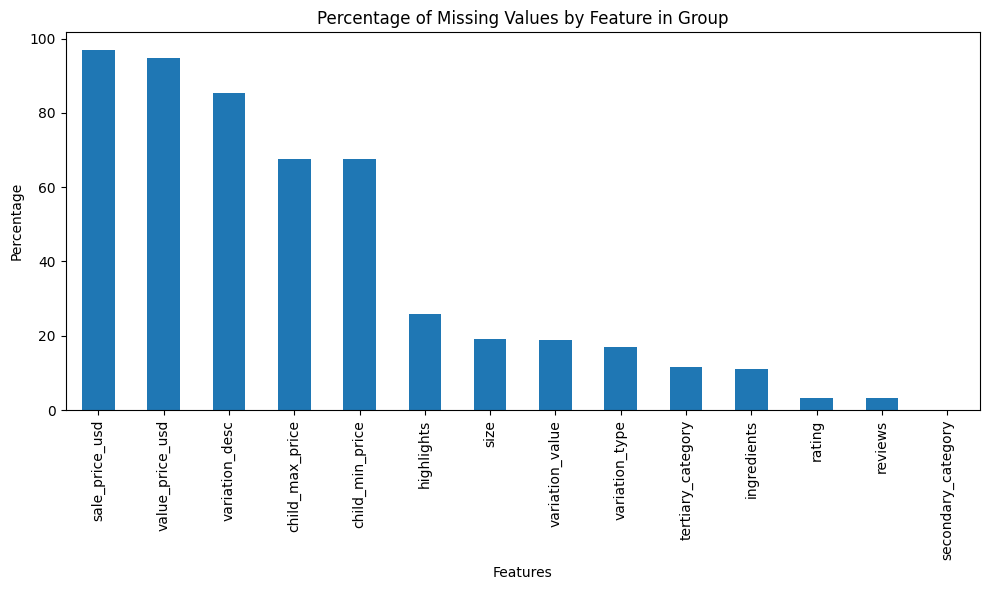

Feature  Missing Count  Missing Percentage
sale_price_usd          sale_price_usd           8224           96.821286
value_price_usd        value_price_usd           8043           94.690370
variation_desc          variation_desc           7244           85.283730
child_max_price        child_max_price           5740           67.577113
child_min_price        child_min_price           5740           67.577113
highlights                  highlights           2207           25.983047
size                              size           1631           19.201789
variation_value        variation_value           1598           18.813280
variation_type          variation_type           1444           17.000235
tertiary_category    tertiary_category            990           11.655286
ingredients                ingredients            945           11.125500
rating                          rating            278            3.272899
reviews                        reviews            278            3.272899
secondary_category  secondary_category              8            0.094184
sephora_exclusive    sephora_exclusive              0            0.000000
brand_id                      brand_id              0            0.000000
child_count                child_count              0            0.000000
primary_category      primary_category              0            0.000000
new                                new              0            0.000000
out_of_stock              out_of_stock              0            0.000000
online_only                online_only              0            0.000000
limited_edition        limited_edition              0            0.000000
brand_name                  brand_name              0            0.000000
product_name              product_name              0            0.000000
price_usd                    price_usd              0            0.000000
loves_count                loves_count              0            0.000000
product_id                  product_id              0            0.000000

In [8]:
quantify_missing_data_by_group(df_product, df_product.columns.tolist())

Dùng correlation -> Check xem missing value do ngẫu nhiên hay ko, có lquan đến cái khác và liệu fill đc ko

#### Duplicate values

In [9]:
# check duplicate
df_product.duplicated().sum()

0

In [10]:
# check unique values
df_product.nunique()

product_id            8494
product_name          8415
brand_id               304
brand_name             304
loves_count           7436
rating                4394
reviews               1556
size                  2055
variation_type           7
variation_value       2729
variation_desc         935
ingredients           6538
price_usd              298
value_price_usd        174
sale_price_usd          88
limited_edition          2
new                      2
online_only              2
out_of_stock             2
sephora_exclusive        2
highlights            4417
primary_category         9
secondary_category      41
tertiary_category      118
child_count             55
child_max_price        222
child_min_price        208
dtype: int64

## Cleaning Product info table

### Boolean data

In [ ]:
#T cx k hiểu sang true false làm gì vì đằng nào cx encode? thà để 1 0

In [11]:
# Converting to boolean
df_product['limited_edition'] = df_product['limited_edition'].astype(bool)
df_product['new'] = df_product['new'].astype(bool)
df_product['online_only'] = df_product['online_only'].astype(bool)
df_product['out_of_stock'] = df_product['out_of_stock'].astype(bool)
df_product['sephora_exclusive'] = df_product['sephora_exclusive'].astype(bool)
df_product[['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']]

limited_edition    new  online_only  out_of_stock  sephora_exclusive
0               False  False         True         False              False
1               False  False         True         False              False
2               False  False         True         False              False
3               False  False         True         False              False
4               False  False         True         False              False
...               ...    ...          ...           ...                ...
8489            False  False        False         False              False
8490            False  False        False         False              False
8491             True   True         True          True              False
8492             True   True         True         False              False
8493            False   True         True         False               True

[8494 rows x 5 columns]

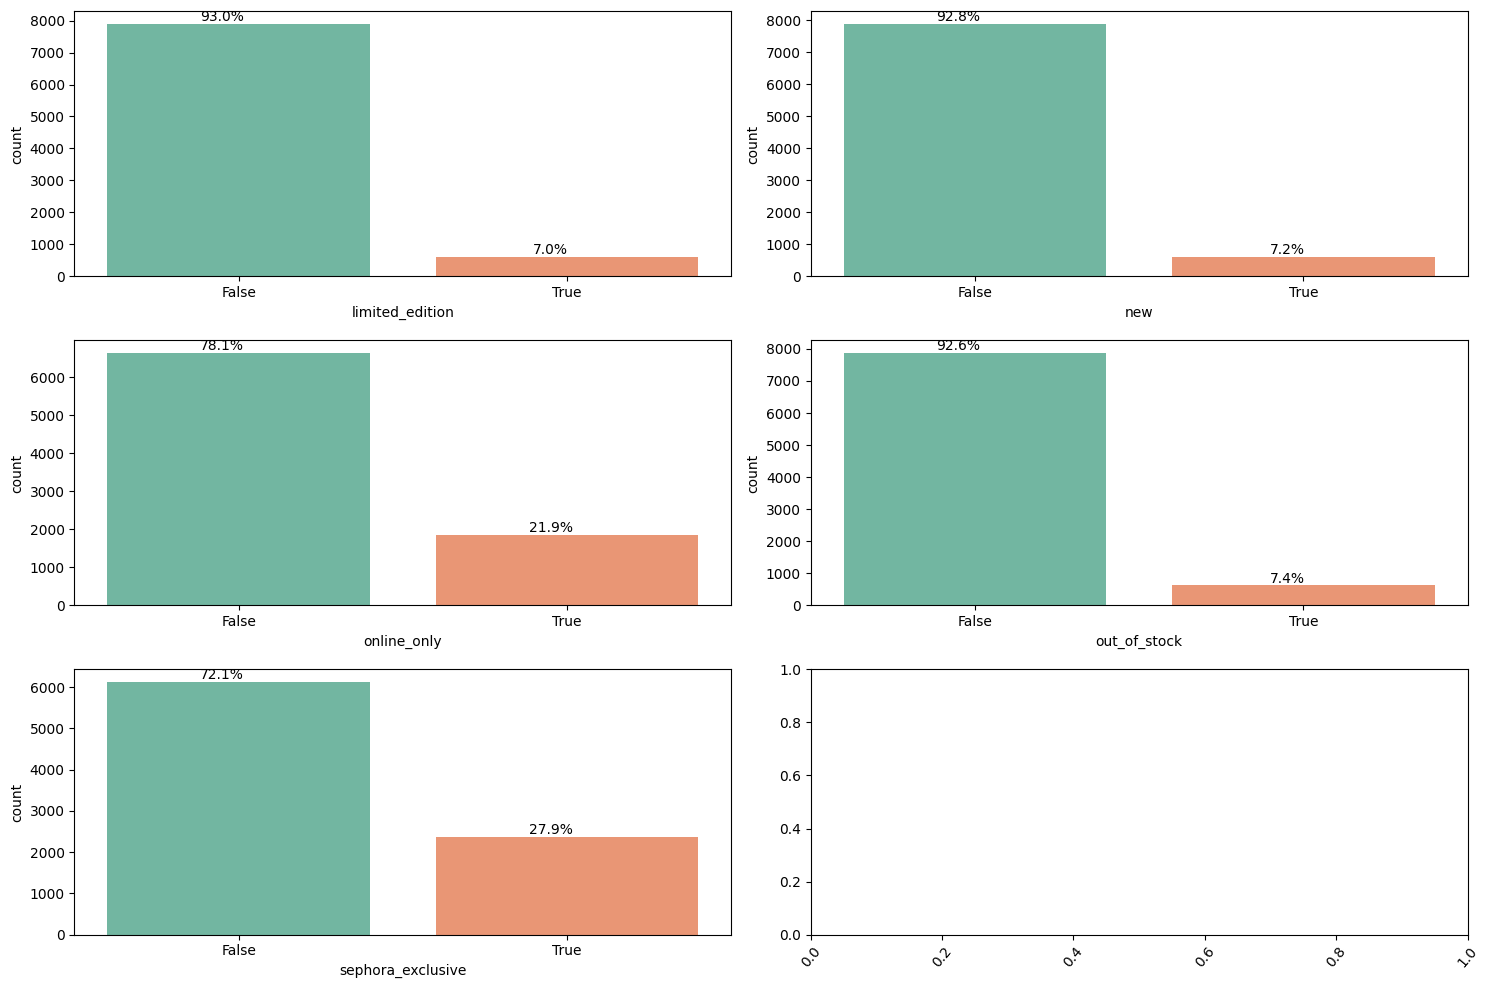

In [12]:
figure, axes = plt.subplots(3, 2, figsize=(15, 10))
dfff = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']

for i, genre in enumerate(dfff):
    row = i // 2
    col = i % 2
    ax = sns.countplot(
        ax=axes[row, col], 
        x=df_product[genre], 
        data=df_product, 
        palette='Set2', 
        hue=df_product[genre],  
        legend=False  
    )
    total = len(df_product[genre])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


In [13]:
def plot_count_by_target_bar(df, columns, cat):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, hue=cat)
        plt.xticks(rotation=45)
        plt.title(f'Count of {col} by {cat}')
        plt.legend(title=cat)
        plt.show()

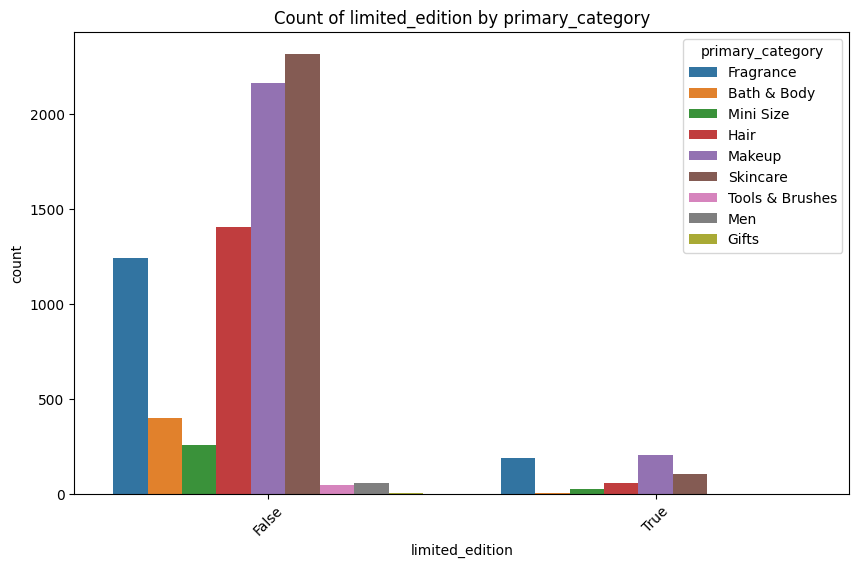

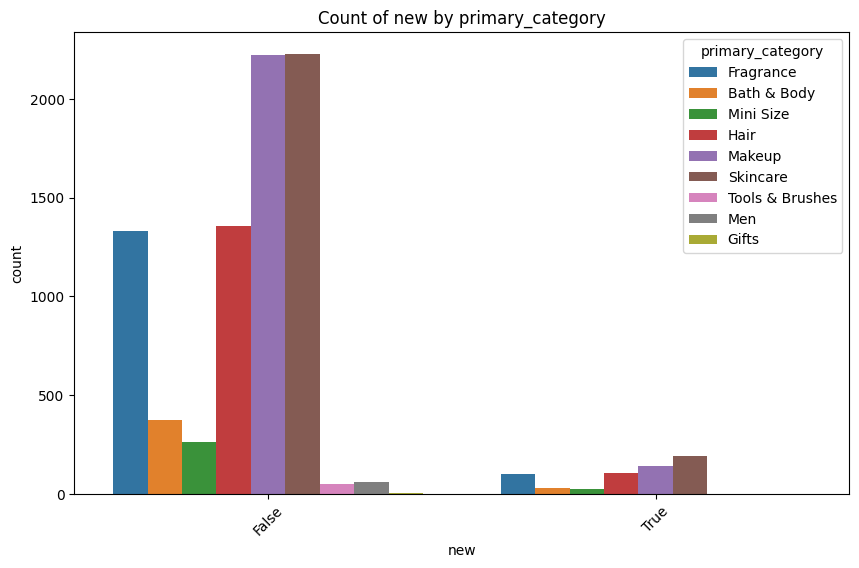

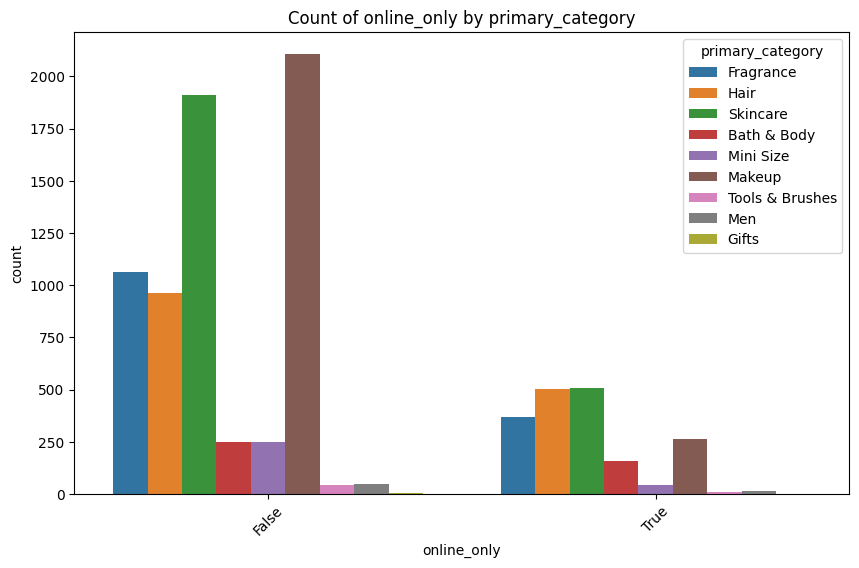

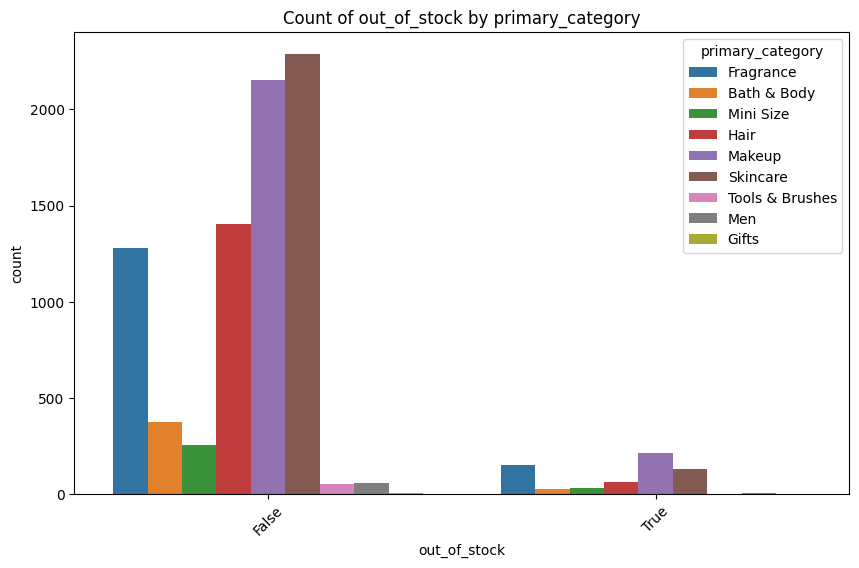

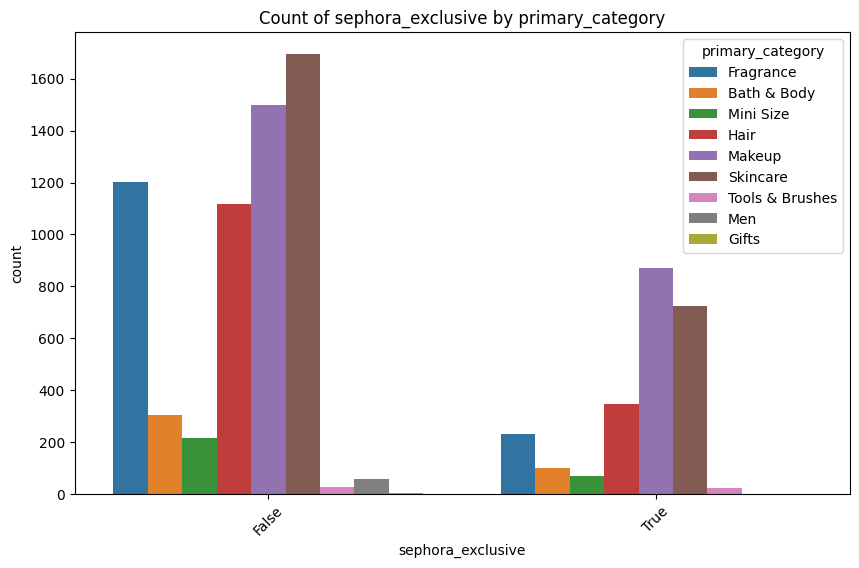

In [ ]:
plot_count_by_target_bar(df_product, ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive'], cat='primary_category')
#Thích thì sửa th thà mỗi categories làm pie chart hợp lý hơn dễ đọc hơn ấy 

# Value counts cho second và ... j đó categories nx

### Numerical data


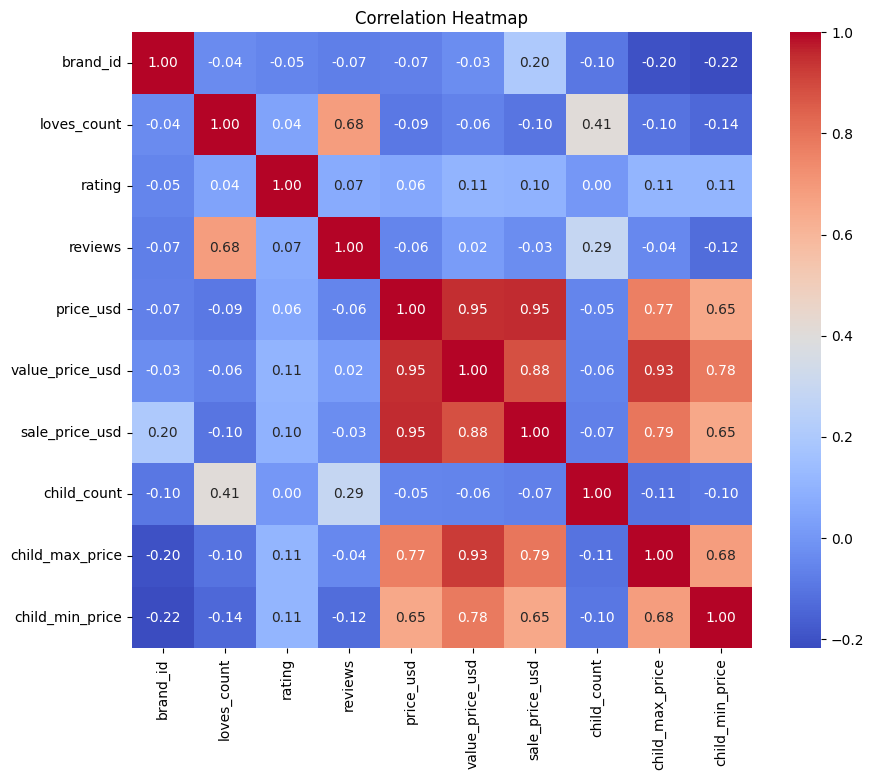

In [15]:
numeric_df = df_product.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()


#### Comment on this heatmap

In [16]:
import warnings

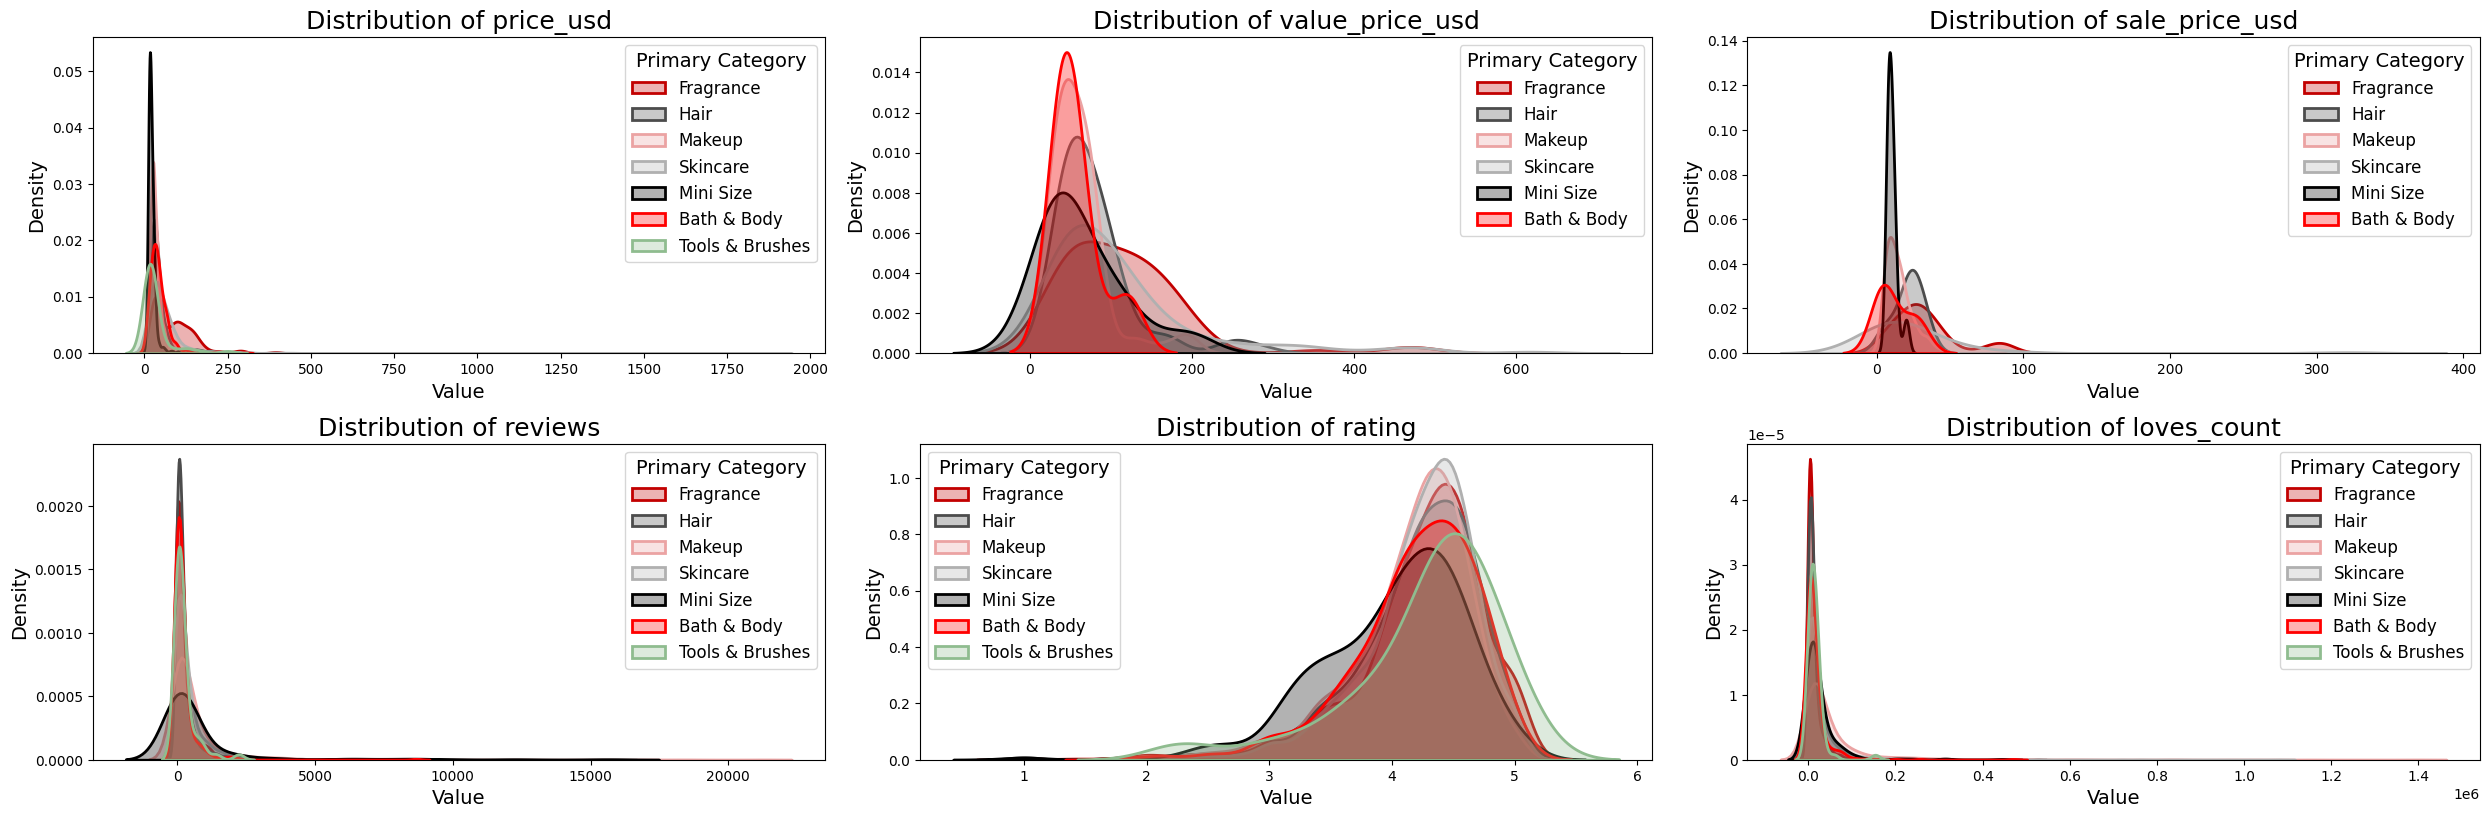

In [17]:
warnings.filterwarnings("ignore")
# Define the list of columns to analyze
ff = ['price_usd', 'value_price_usd', 'sale_price_usd', 'reviews', 'rating', 'loves_count']

# Existing code
fig = plt.figure(figsize=(25, 20))
colors = {
    'Fragrance': '#C20000',
    'Hair': '#4C4C4C',
    'Makeup': '#EBA3A3',
    'Skincare': '#B0B0B0',
    'Mini Size': 'black',
    'Bath & Body': 'red',
    'Tools & Brushes': 'darkseagreen'
}
for i, col in enumerate(ff):
    ax = fig.add_subplot(5, 3, i + 1)
    for category, color in colors.items():
        category_data = df_product[df_product['primary_category'] == category][col]
        if not category_data.empty:
            sns.kdeplot(
                category_data,
                color=color,
                label=category,
                linewidth=2,
                fill=True,
                alpha=0.3
            )
    ax.set_title(f'Distribution of {col}', fontsize=18)
    ax.set_xlabel("Value", fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    ax.legend(title='Primary Category', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

Comment

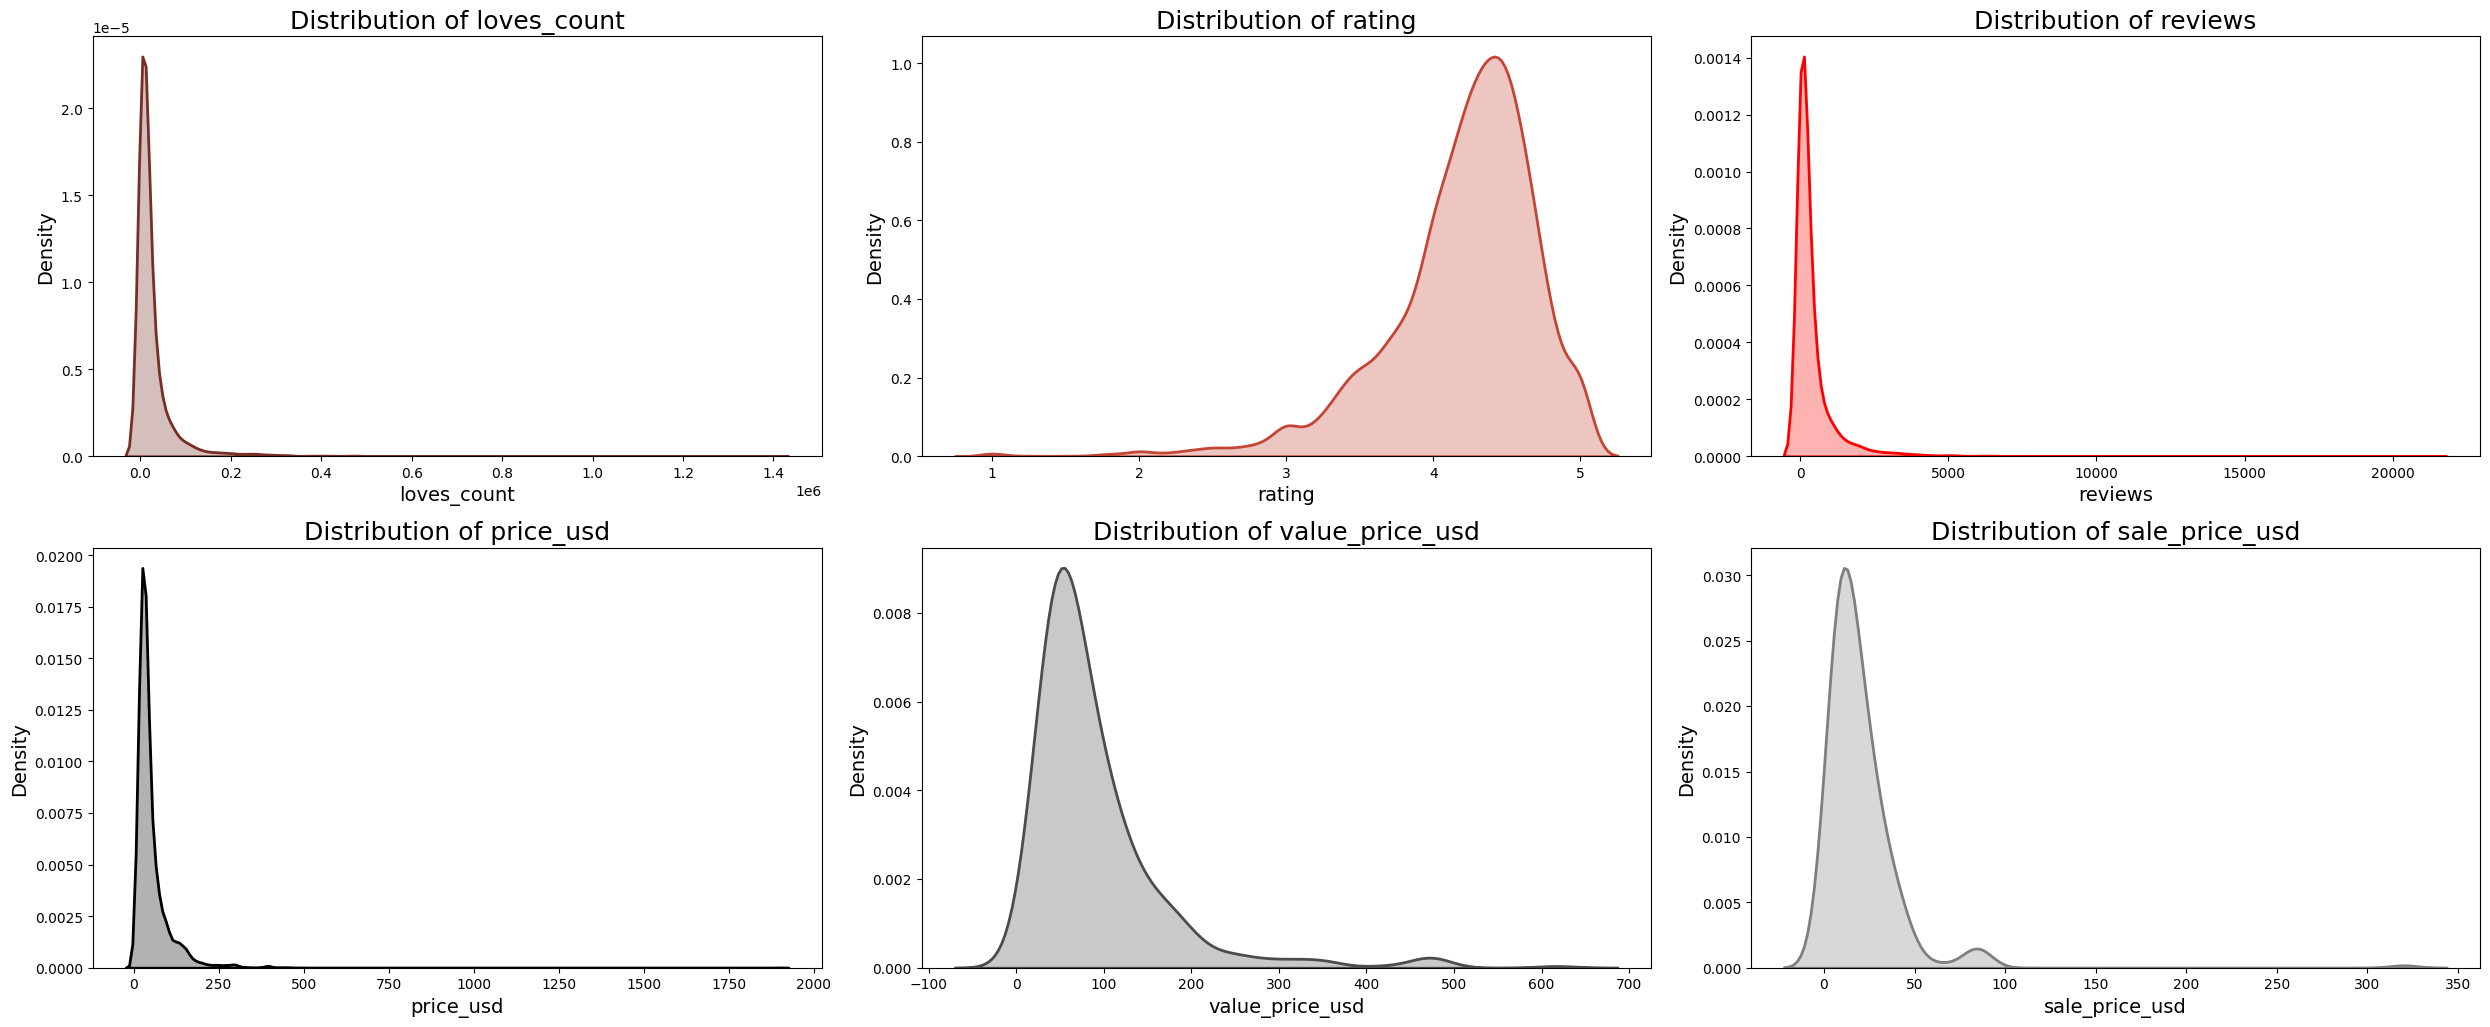

In [18]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(25, 15))
colors = {
    'loves_count': '#772E25',
    'rating': '#C44536',
    'reviews': 'red',
    'price_usd': '#000000',
    'value_price_usd': '#4C4C4C',
    'sale_price_usd': '#7F7F7F'}
features = ['loves_count', 'rating', 'reviews', 'price_usd', 'value_price_usd', 'sale_price_usd']
for i, feature in enumerate(features):
    ax = plt.subplot(3, 3, i + 1)  
    sns.kdeplot(df_product[feature], color=colors[feature], linewidth=2, fill=True, alpha=0.3)
    ax.set_title(f'Distribution of {feature}', fontsize=18)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
plt.tight_layout()
plt.show()


Co cai tren r thi lieu can cai nay koo

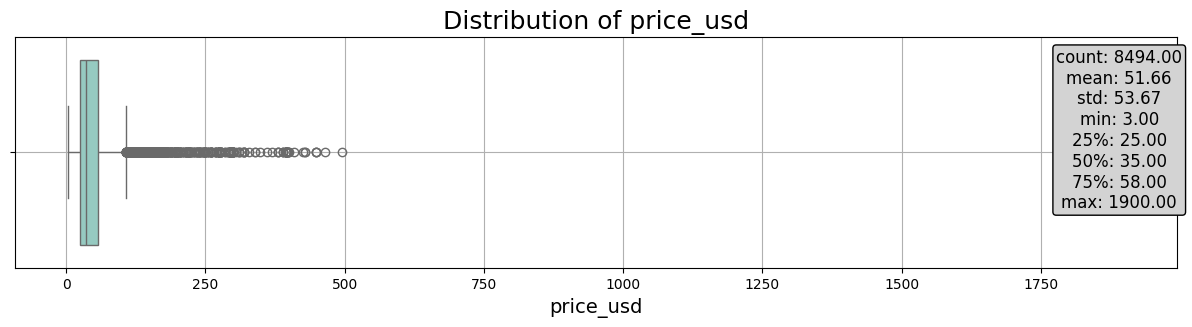

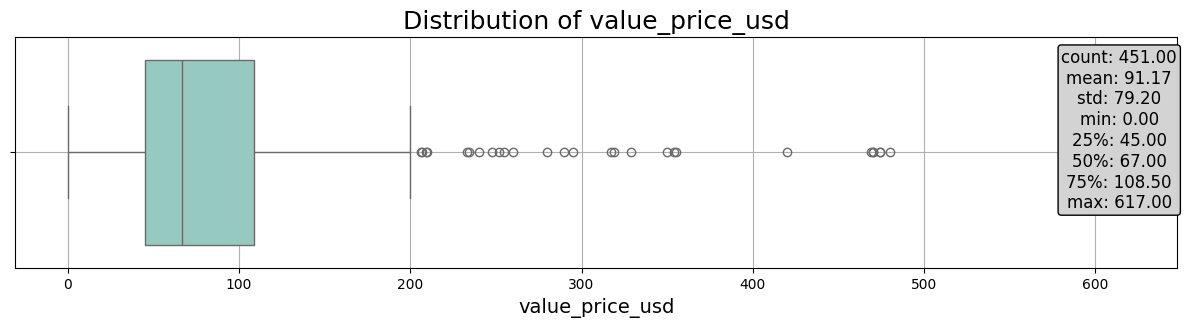

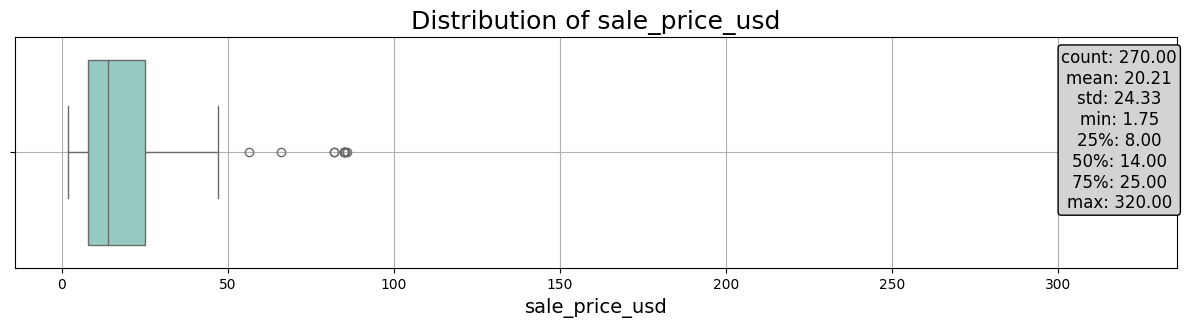

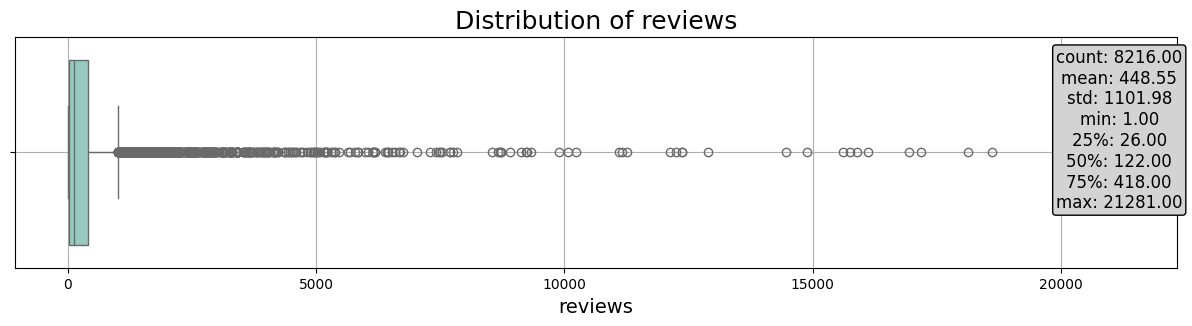

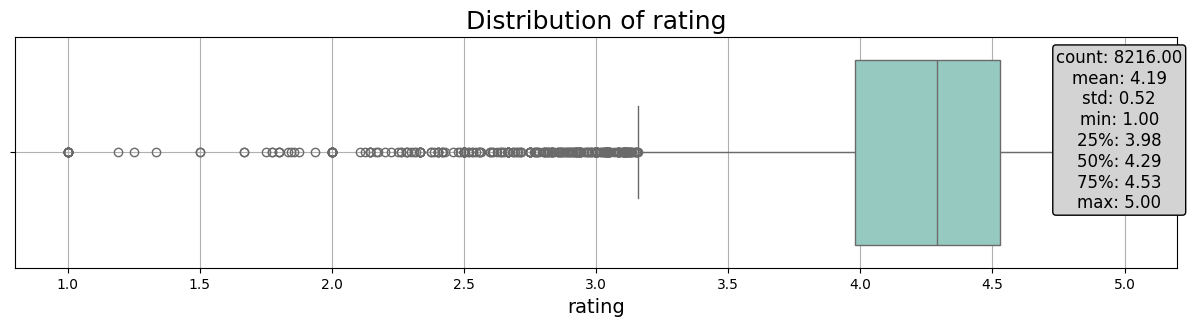

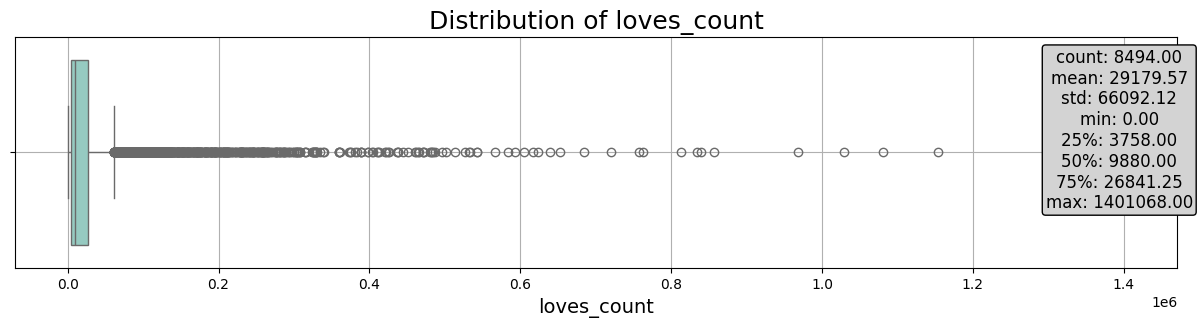

In [19]:
for column in ff:
    plt.figure(figsize=(15, 3)) 
    sns.boxplot(x=df_product[column], palette='Set3')
    plt.title(f'Distribution of {column}', fontsize=18)
    plt.xlabel(column, fontsize=14)
    stats = df_product[column].describe()
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='lightgrey'))
    plt.grid(True) 
    plt.show()

Viec outlier no con tuy thuoc vao column day la gi, thu dung describe de xem - value price vs price khac nhau cho nao va tai sao lai xuat phat tu 0

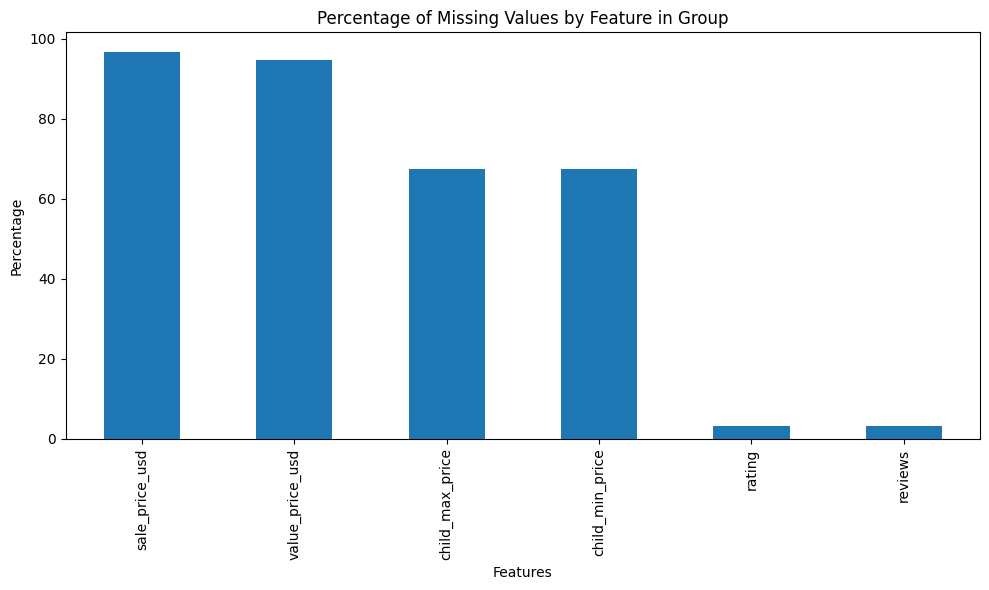

Feature  Missing Count  Missing Percentage
sale_price_usd    sale_price_usd           8224           96.821286
value_price_usd  value_price_usd           8043           94.690370
child_max_price  child_max_price           5740           67.577113
child_min_price  child_min_price           5740           67.577113
rating                    rating            278            3.272899
reviews                  reviews            278            3.272899
brand_id                brand_id              0            0.000000
loves_count          loves_count              0            0.000000
price_usd              price_usd              0            0.000000
child_count          child_count              0            0.000000

In [20]:
quantify_missing_data_by_group(numeric_df, numeric_df.columns.tolist())

In [21]:
# These columns have a high percentage of missing values
# and are not useful for our analysis
# cols = """sale_price_usd
# value_price_usd
# child_max_price
# child_min_price"""

# cols_list = cols.split("\n")
# # Drop the columns
# df_product.drop(columns=cols_list,axis=1,inplace=True)

#### Outlier

In [22]:
# CHECK OUTLIERS
def find_outlier_columns(data, method):
    outlier_columns = []

    # Loop through numerical columns
    for column in data.select_dtypes(include='number').columns:
        if method == 'iqr':
            # Using the Interquartile Range (IQR) method to detect outliers
            Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
            Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1  # Interquartile range
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            # Check if any values fall outside the bounds
            if ((data[column] < lower_limit) | (data[column] > upper_limit)).any():
                outlier_columns.append(column)
        elif method == 'std':
            # Using the Standard Deviation (STD) method to detect outliers
            mean_value = data[column].mean()
            std_dev = data[column].std()
            lower_limit = mean_value - 3 * std_dev
            upper_limit = mean_value + 3 * std_dev
            # Check if any values fall outside the bounds
            if ((data[column] < lower_limit) | (data[column] > upper_limit)).any():
                outlier_columns.append(column)

    return outlier_columns

# Function to create boxplots for columns with outliers
def visualize_outlier_columns(data, method='iqr'):
    outlier_columns = find_outlier_columns(data, method)

    # If no outliers are found, exit the function
    if not outlier_columns:
        print("No outliers detected in any column.")
        return

    # Calculate layout for boxplots
    total_columns = len(outlier_columns)
    rows = (total_columns + 2) // 3  # Arrange plots in rows with 3 plots per row

    # Create subplots
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    # Generate a boxplot for each column with outliers
    for idx, column in enumerate(outlier_columns):
        sns.boxplot(x=data[column], ax=axes[idx])
        axes[idx].set_title(f'Boxplot: {column}')
        axes[idx].set_xlabel('Values')

    # Turn off unused axes
    for idx in range(total_columns, len(axes)):
        axes[idx].axis('off')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

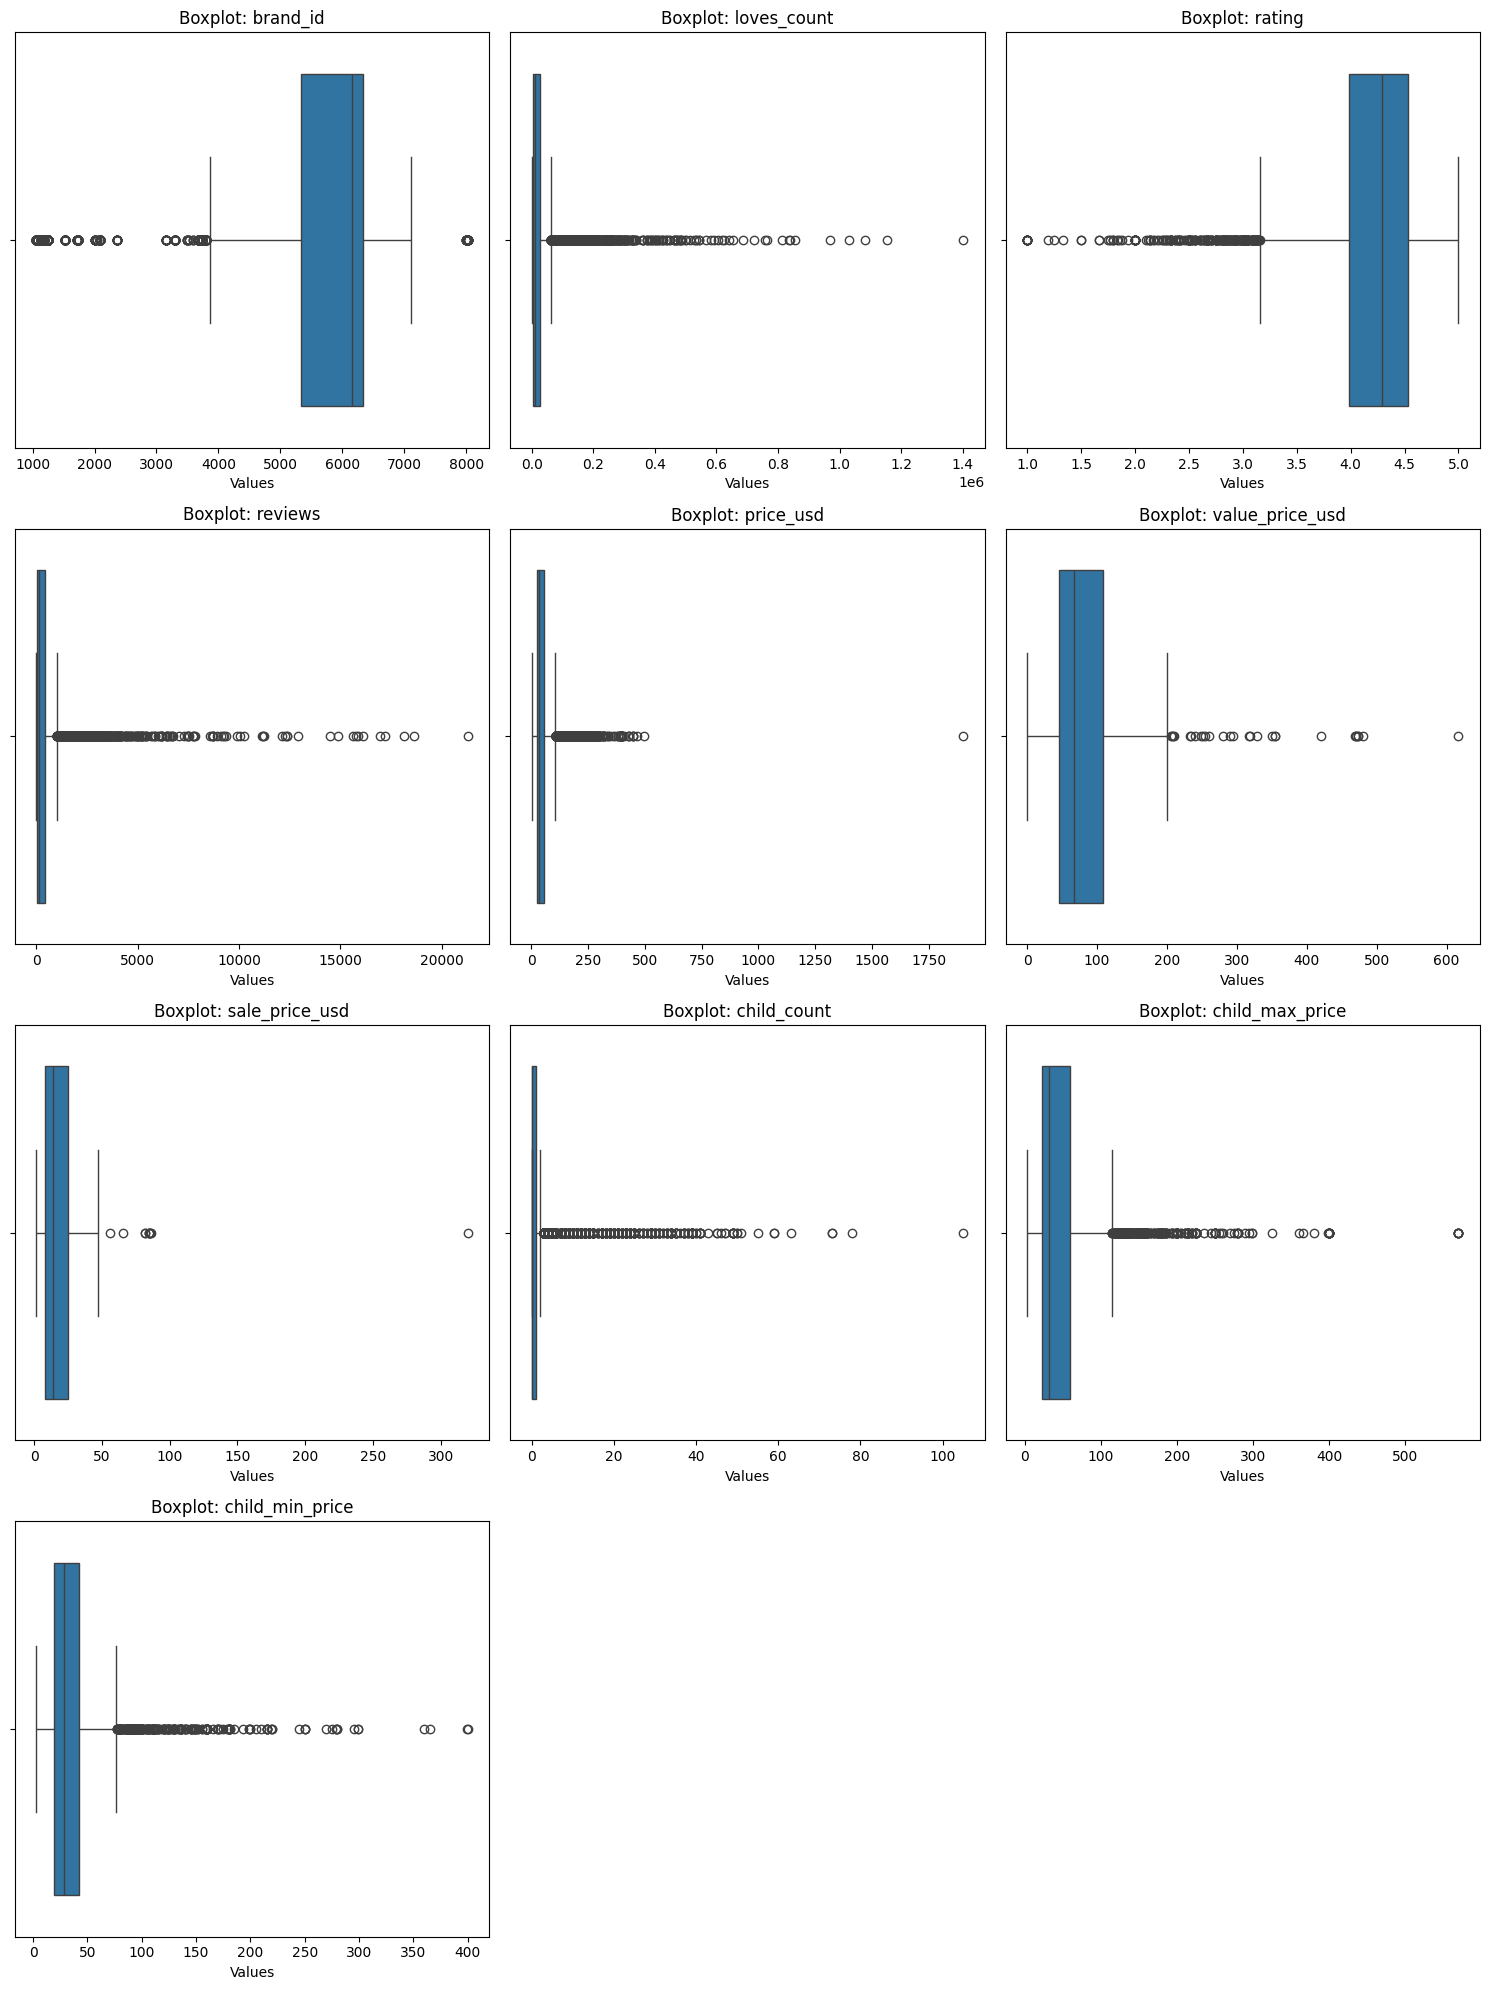

In [23]:
visualize_outlier_columns(df_product, method='iqr')

Nay box plot xong h box plot tiep a :))) ko ko gom lai 1 cho 

In [24]:
def handle_outliers_iqr(data: pd.DataFrame):
    # Select only numeric columns
    numeric_cols = data.select_dtypes(include="number").columns

    bounds = {}
    for col in numeric_cols:
        # Calculate Q1, Q3, and IQR for X_train
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)

        # Print the bounds
        print(f"Column: {col}")
        print(f"  Lower Bound: {lower_bound}")
        print(f"  Upper Bound: {upper_bound}")

    data_clipped = data.copy()

    for col, (lower_bound, upper_bound) in bounds.items():
        data_clipped[col] = np.clip(data[col], lower_bound, upper_bound)
        data_clipped[col] = np.clip(data[col], lower_bound, upper_bound)
    return data_clipped

In [25]:
# df_product = handle_outliers_iqr(df_product)

In [26]:
# num_cols = df_product.select_dtypes(include='number').columns
# for col in num_cols:
#   plt.figure(figsize=(8,3))
#   plt.subplot(1,2,1)
#   sns.boxplot(df_product[col])
#   plt.title('Values')


### Categorical data

In [27]:
cat_df = df_product.select_dtypes(include="object")
cat_df.head()

product_id               product_name brand_name            size  \
0    P473671    Fragrance Discovery Set      19-69             NaN   
1    P473668    La Habana Eau de Parfum      19-69  3.4 oz/ 100 mL   
2    P473662  Rainbow Bar Eau de Parfum      19-69  3.4 oz/ 100 mL   
3    P473660       Kasbah Eau de Parfum      19-69  3.4 oz/ 100 mL   
4    P473658  Purple Haze Eau de Parfum      19-69  3.4 oz/ 100 mL   

                       variation_type variation_value variation_desc  \
0                                 NaN             NaN            NaN   
1  Size + Concentration + Formulation  3.4 oz/ 100 mL            NaN   
2  Size + Concentration + Formulation  3.4 oz/ 100 mL            NaN   
3  Size + Concentration + Formulation  3.4 oz/ 100 mL            NaN   
4  Size + Concentration + Formulation  3.4 oz/ 100 mL            NaN   

                                         ingredients  \
0  ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...   
1  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   
2  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   
3  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   
4  ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   

                                          highlights primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...        Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   

  secondary_category  tertiary_category  
0  Value & Gift Sets  Perfume Gift Sets  
1              Women            Perfume  
2              Women            Perfume  
3              Women            Perfume  
4              Women            Perfume

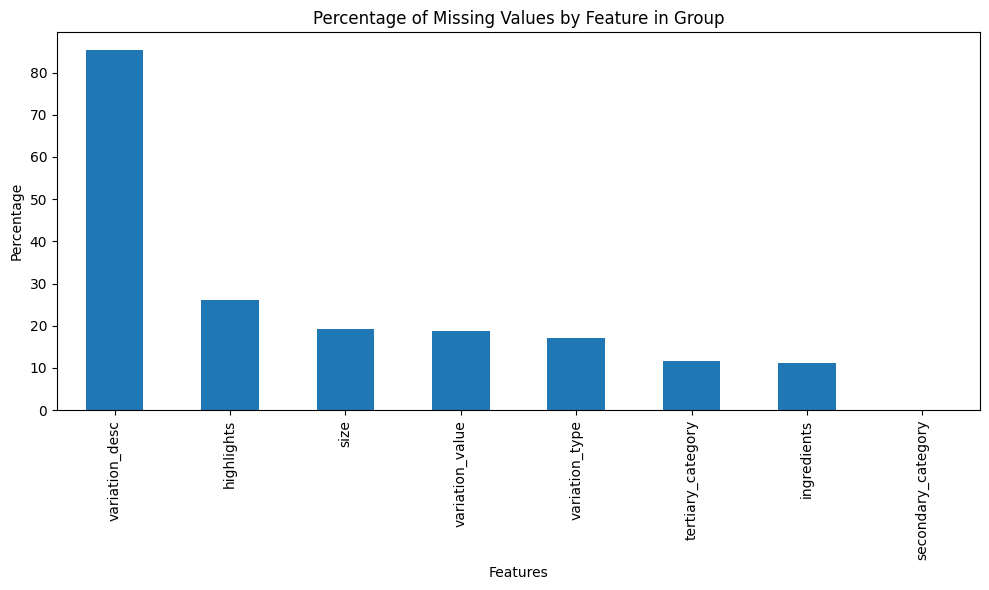

Feature  Missing Count  Missing Percentage
variation_desc          variation_desc           7244           85.283730
highlights                  highlights           2207           25.983047
size                              size           1631           19.201789
variation_value        variation_value           1598           18.813280
variation_type          variation_type           1444           17.000235
tertiary_category    tertiary_category            990           11.655286
ingredients                ingredients            945           11.125500
secondary_category  secondary_category              8            0.094184
product_id                  product_id              0            0.000000
product_name              product_name              0            0.000000
brand_name                  brand_name              0            0.000000
primary_category      primary_category              0            0.000000

In [28]:
quantify_missing_data_by_group(cat_df, cat_df.columns.tolist())

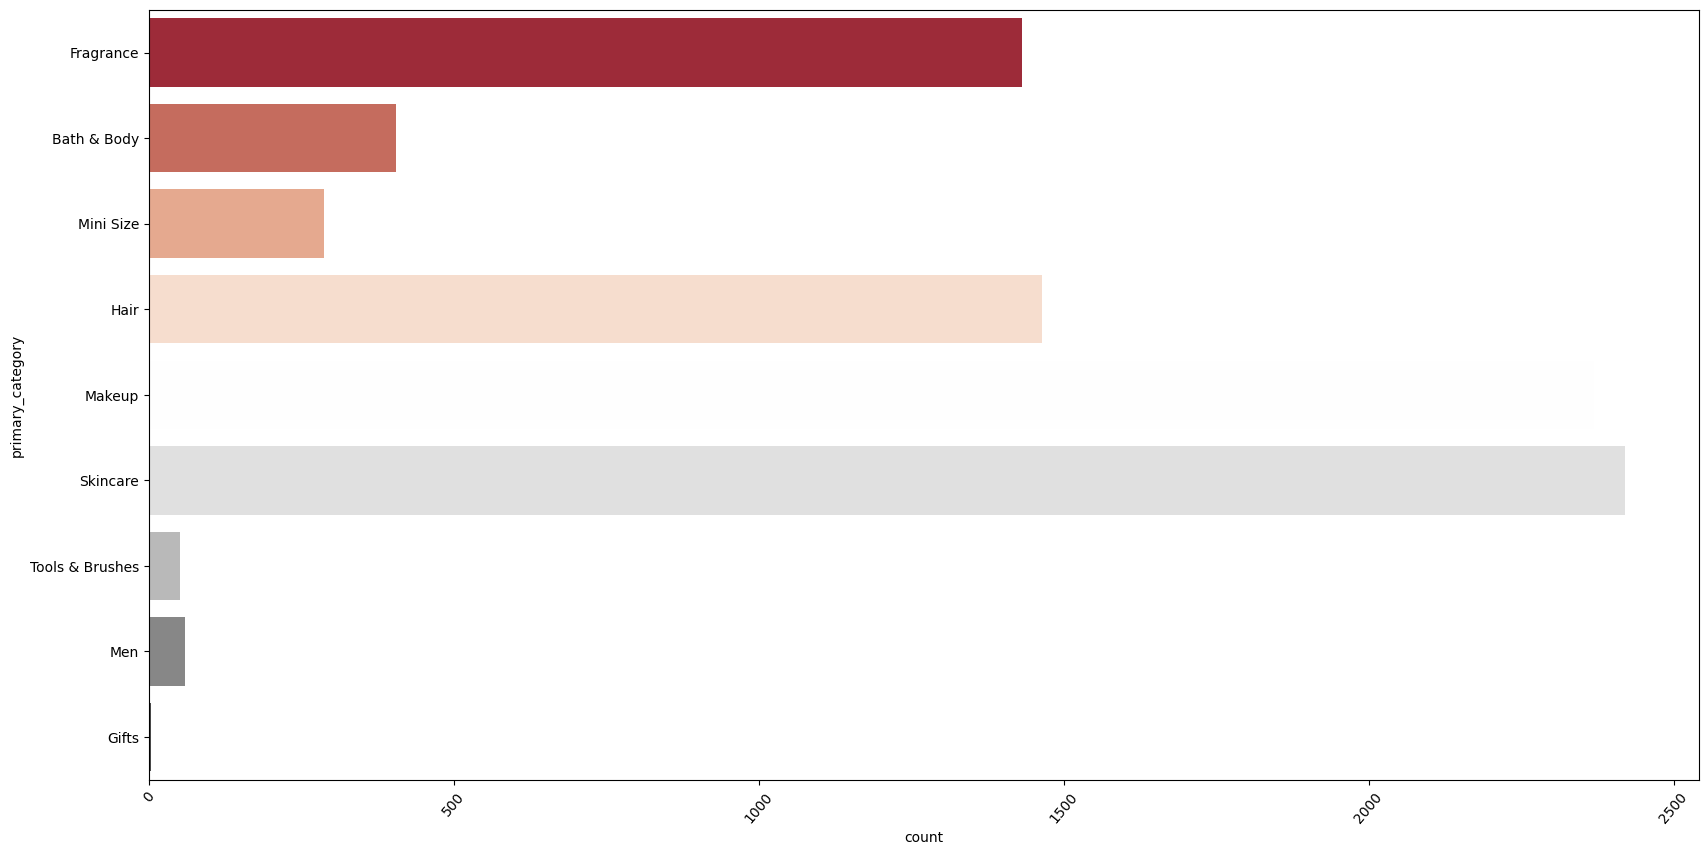

In [29]:
ww = df_product["primary_category"]
plt.figure(figsize=(20, 10))
plt.xticks(rotation=50)
sns.countplot(y=ww,palette='RdGy')
plt.show()

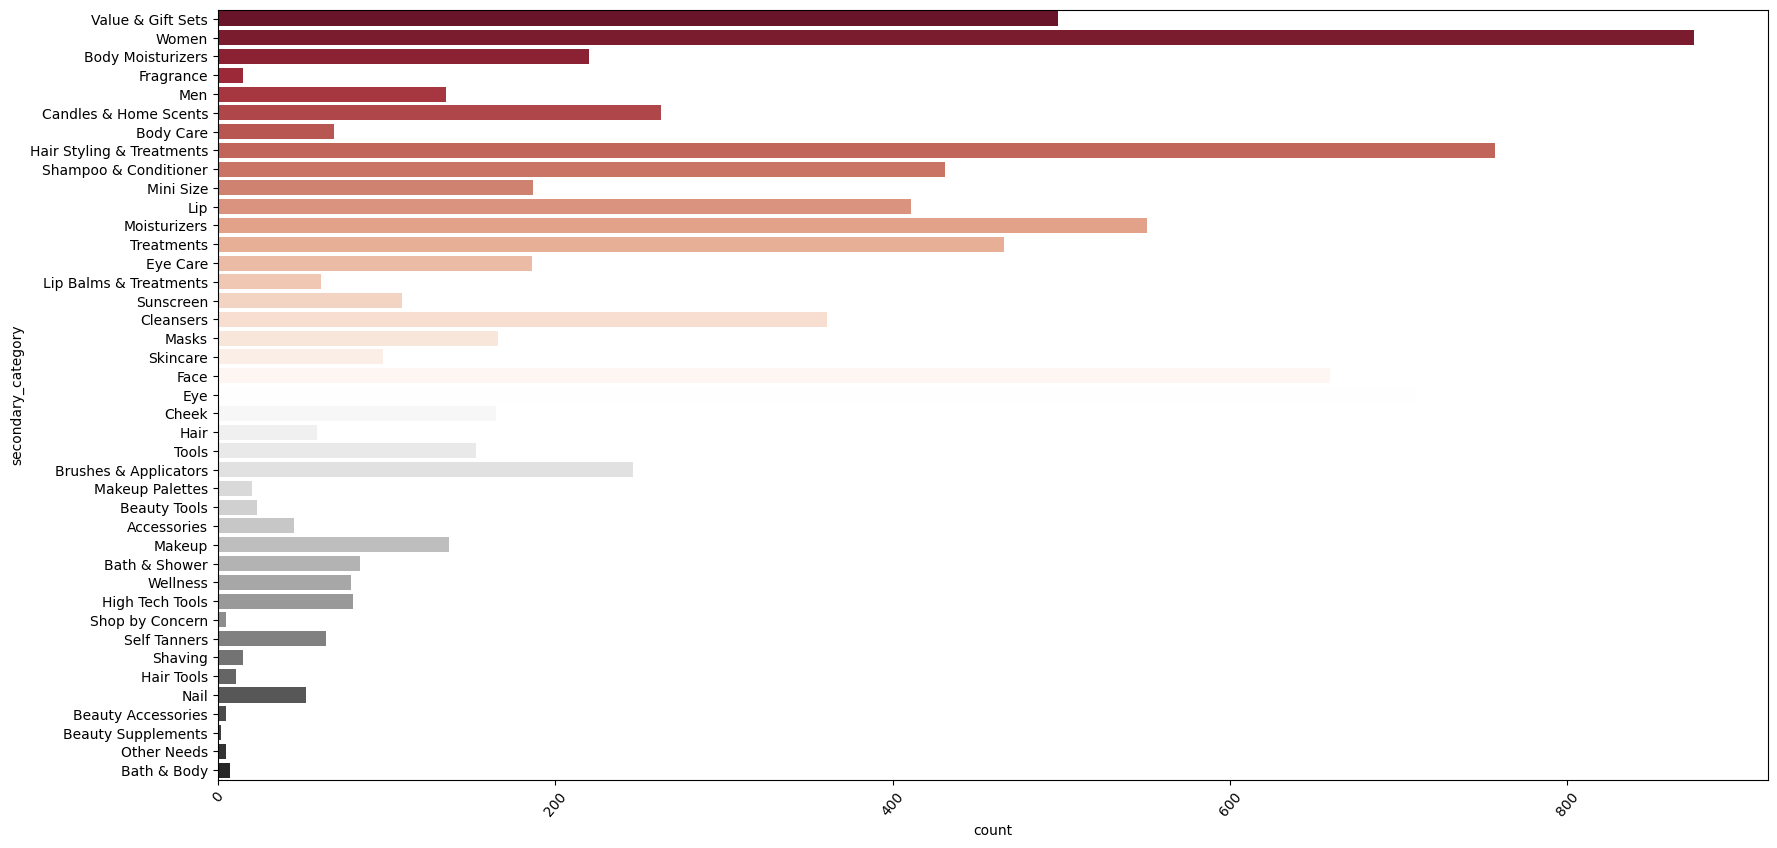

In [30]:
ww = df_product["secondary_category"]
plt.figure(figsize=(20, 10))
plt.xticks(rotation=50)
sns.countplot(y=ww,palette='RdGy')
plt.show()

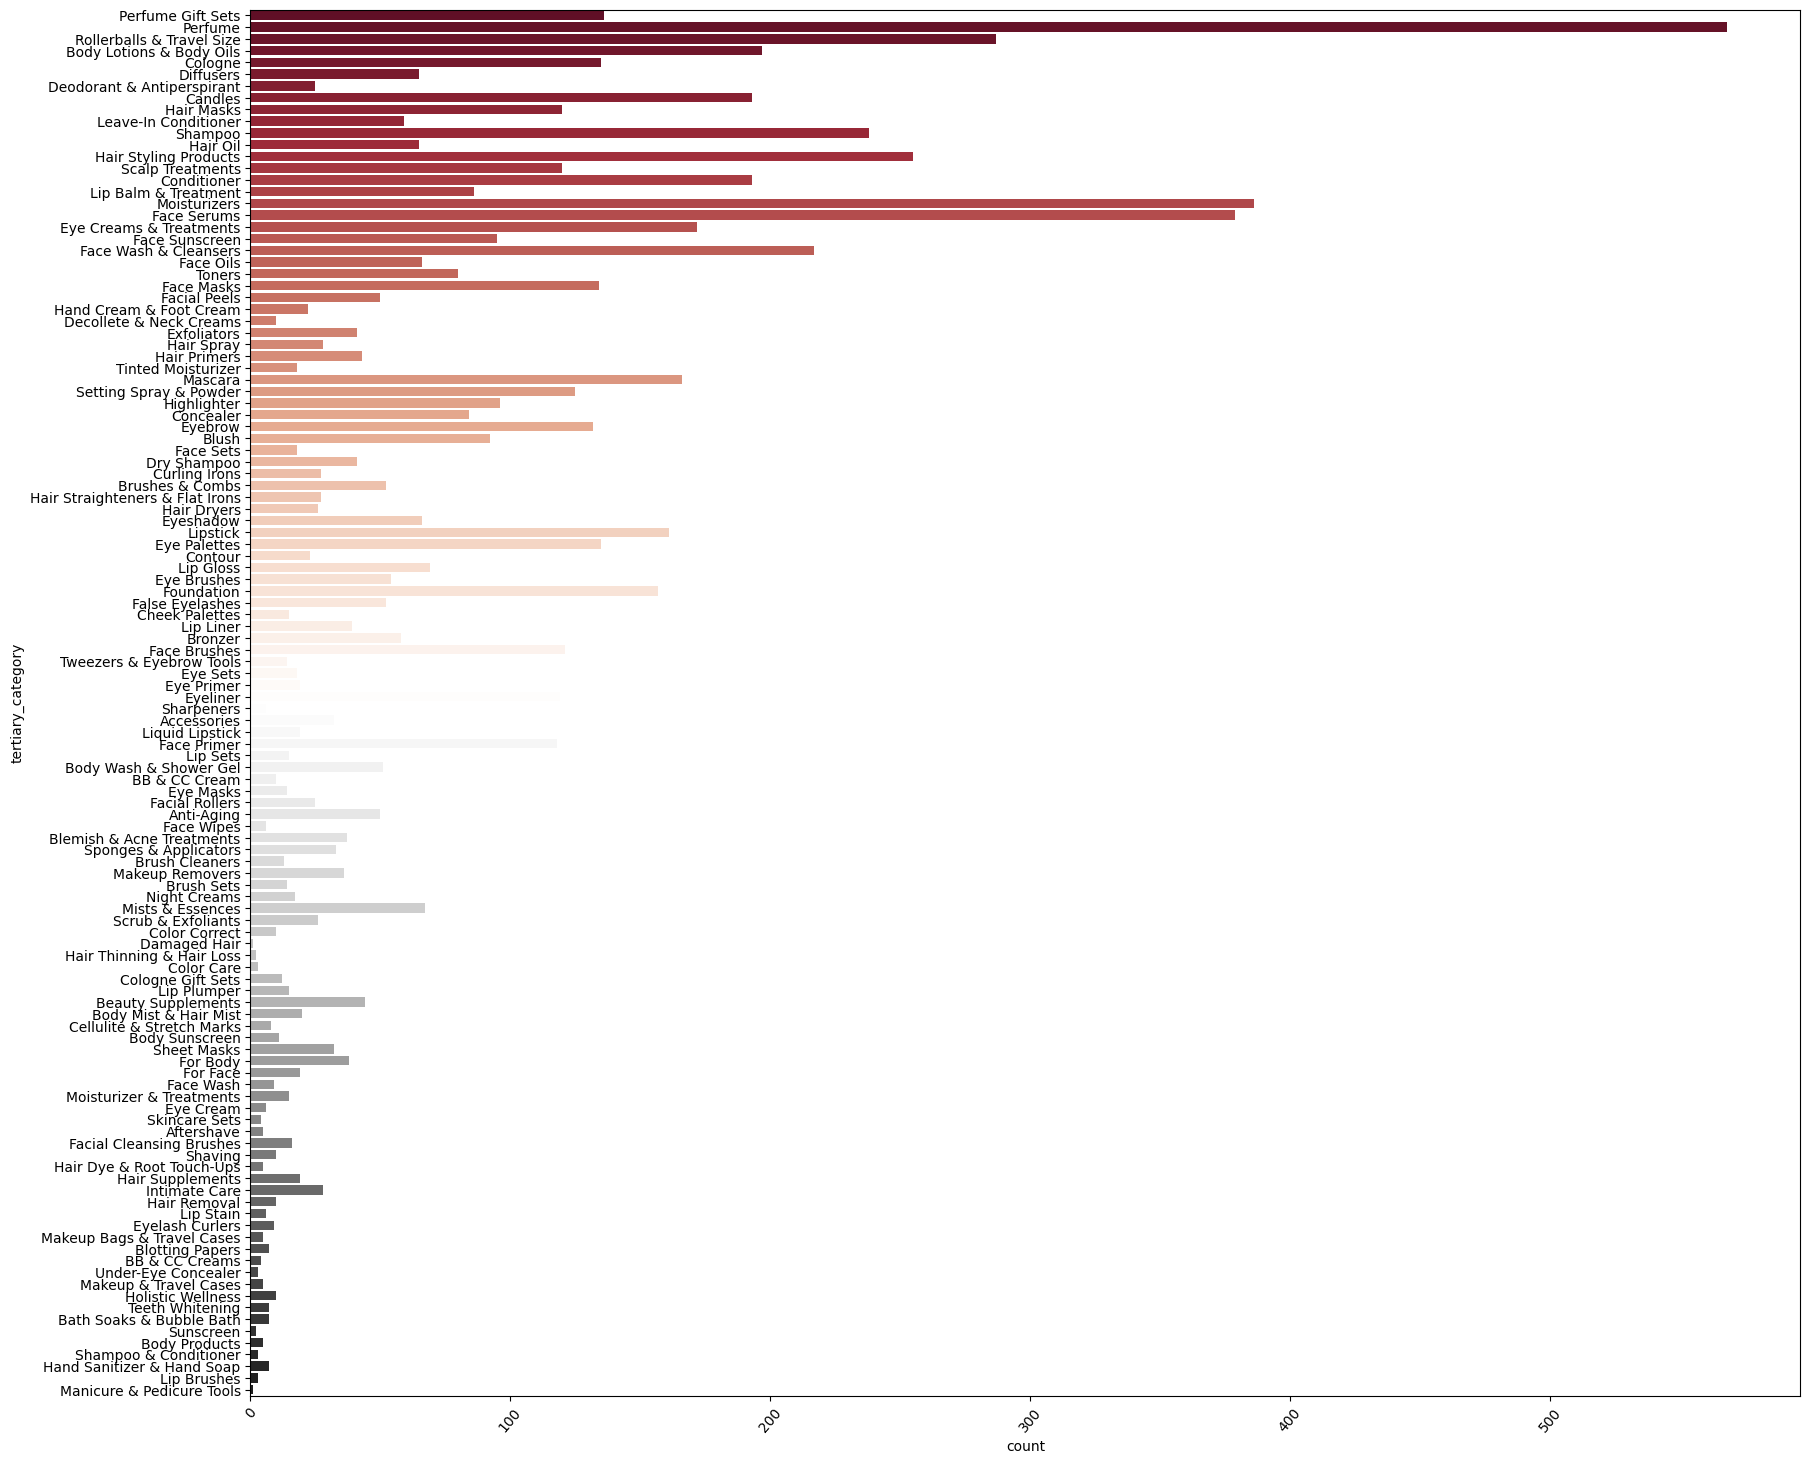

In [31]:
ww = df_product["tertiary_category"]
plt.figure(figsize=(20, 18))
plt.xticks(rotation=50)
sns.countplot(y=ww,palette='RdGy')
plt.show()

In [32]:
df_product['size'].value_counts()

size
1.7 oz/ 50 mL          500
1 oz/ 30 mL            366
3.4 oz/ 100 mL         211
0.5 oz/ 15 mL          171
1.7 oz / 50 mL         124
                      ... 
2 x 0.28 oz/ 8.5 ml      1
0.2 oz /5.8 g            1
0.14 oz/ 4.2mL           1
0.44 oz/ 12.5g           1
.11 oz / 3.2 mL          1
Name: count, Length: 2055, dtype: int64

In [33]:
df_product['variation_value'].value_counts()

variation_value
1.7 oz/ 50 mL                       374
1 oz/ 30 mL                         302
0.5 oz/ 15 mL                       147
3.4 oz/ 100 mL                      128
1.7 oz / 50 mL                       96
                                   ... 
Obsidian                              1
Diffused Bronze Light                 1
Mini Size - 0.31 oz/ 8.9 mL           1
Champagne Flash                       1
2 oz / 60 mL eau de parfum spray      1
Name: count, Length: 2729, dtype: int64

In [34]:
df_product['variation_desc'].value_counts()

variation_desc
black                     46
clear                     14
nude pink                 10
pink                       8
champagne                  8
                          ..
Vivid Fuchsia              1
pewter                     1
warm scarlet               1
light medium to medium     1
cherry red                 1
Name: count, Length: 935, dtype: int64

In [35]:
df_product['variation_type'].value_counts()

variation_type
Size                                  4043
Color                                 1700
Size + Concentration + Formulation    1173
Type                                    88
Scent                                   30
Size + Concentration                    11
Formulation                              5
Name: count, dtype: int64

In [36]:
df_product['highlights'].value_counts()

highlights
['Layerable Scent', 'Floral Scent']                                                                     64
['Vegan', 'Unisex/ Genderless Scent', 'Clean at Sephora', 'Cruelty-Free']                               48
['Vegan', 'Cruelty-Free']                                                                               40
['Vegan', 'Without Phthalates', 'Without Parabens', 'Without Sulfates SLS & SLES', 'Cruelty-Free']      40
['Floral Scent', 'Layerable Scent']                                                                     37
                                                                                                        ..
['Vegan', 'Natural Finish', 'Liquid Formula', 'Long-wearing', 'Medium Coverage', 'Cruelty-Free']         1
['Natural Finish', 'Without Parabens', 'Long-wearing', 'Vegan', 'Without Triclosan', 'Cruelty-Free']     1
['allure 2019 Best of Beauty Award Winner', 'Cruelty-Free', 'Vegan']                                     1
['Lengthening', 'Without P

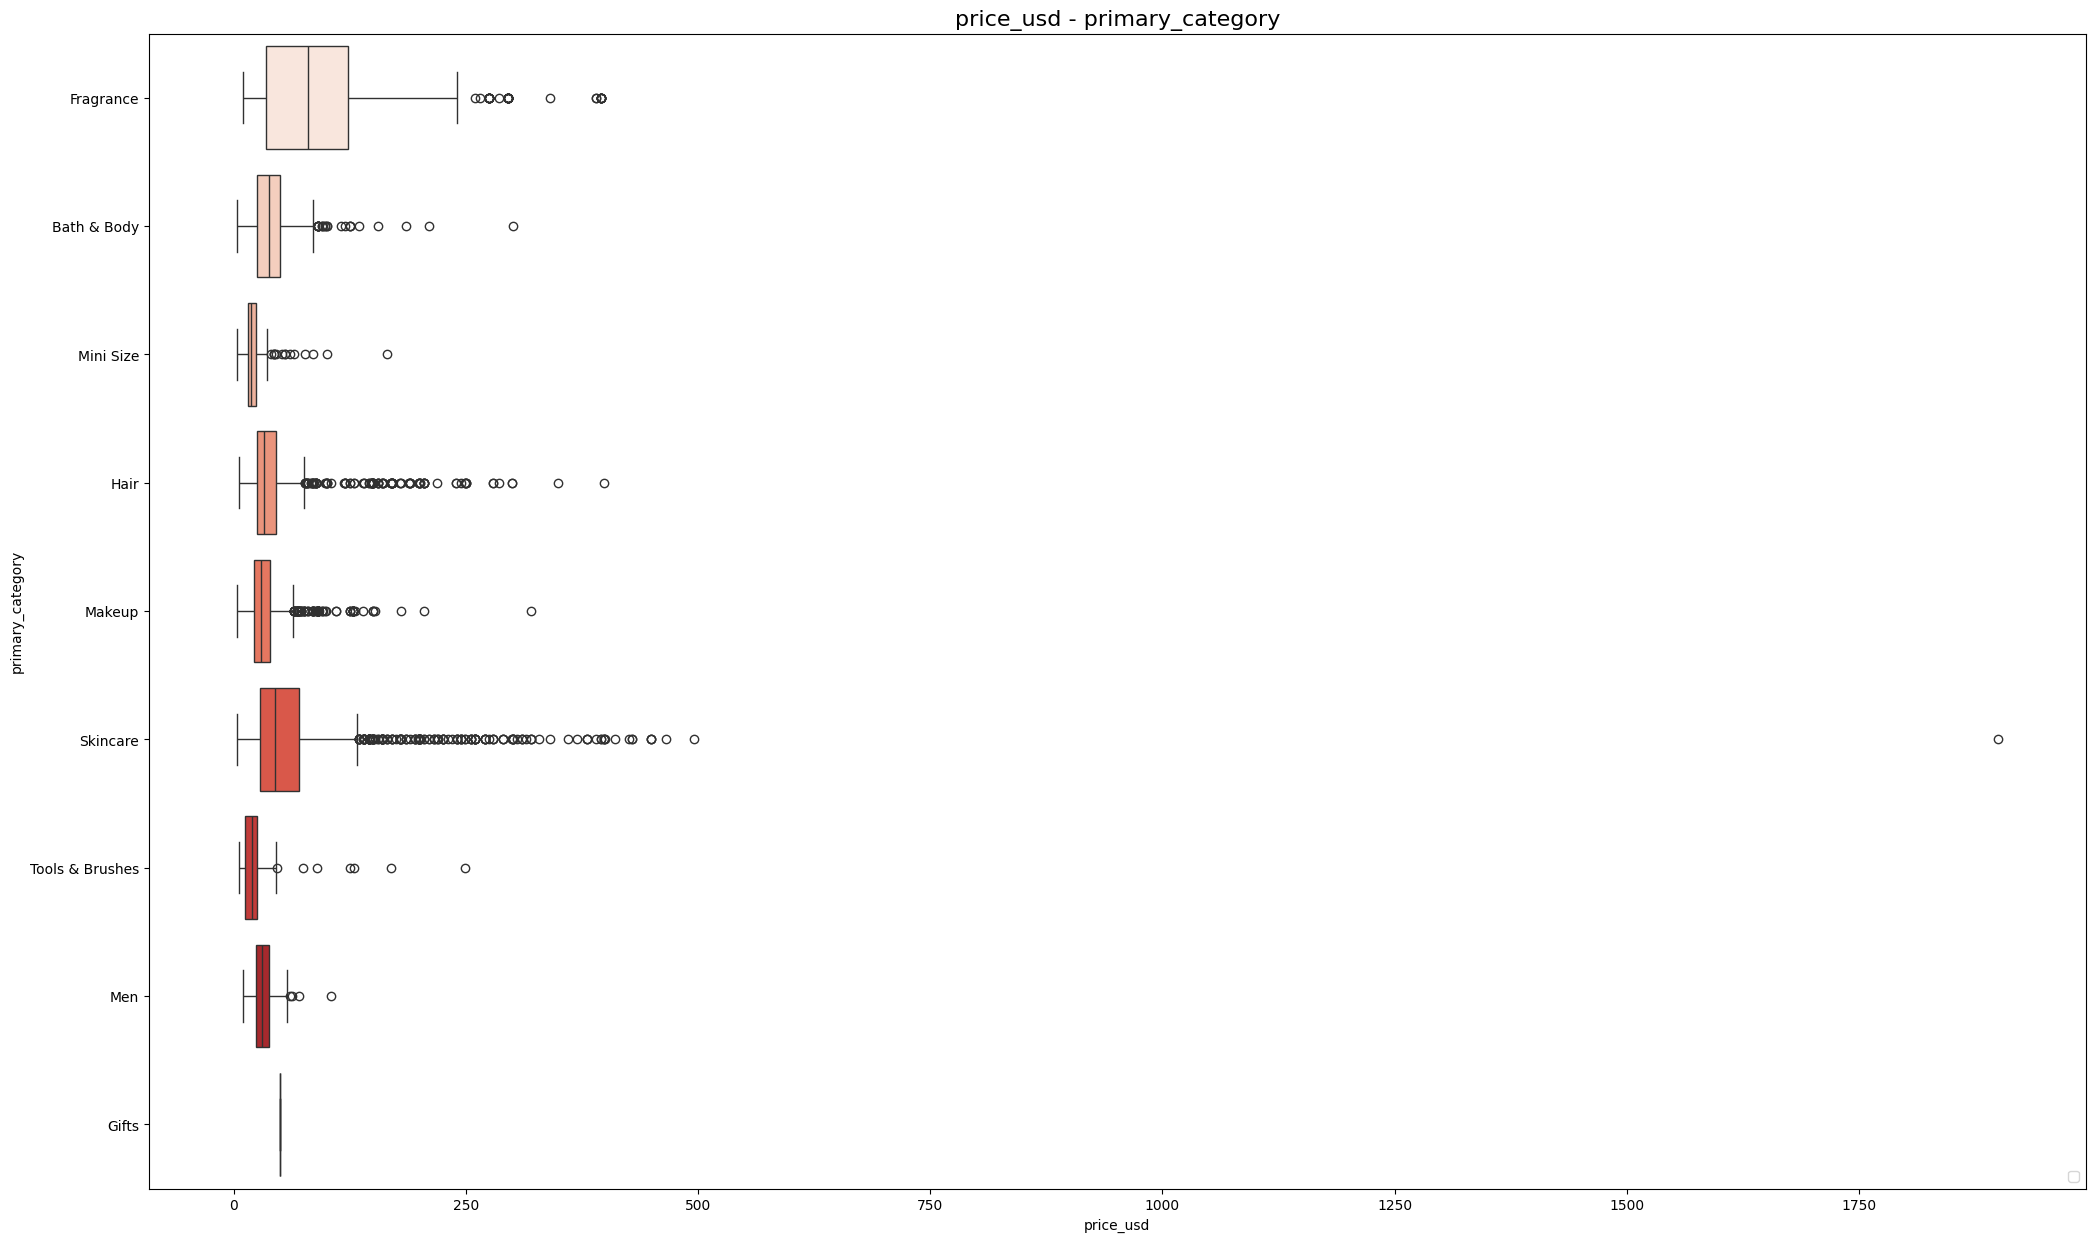

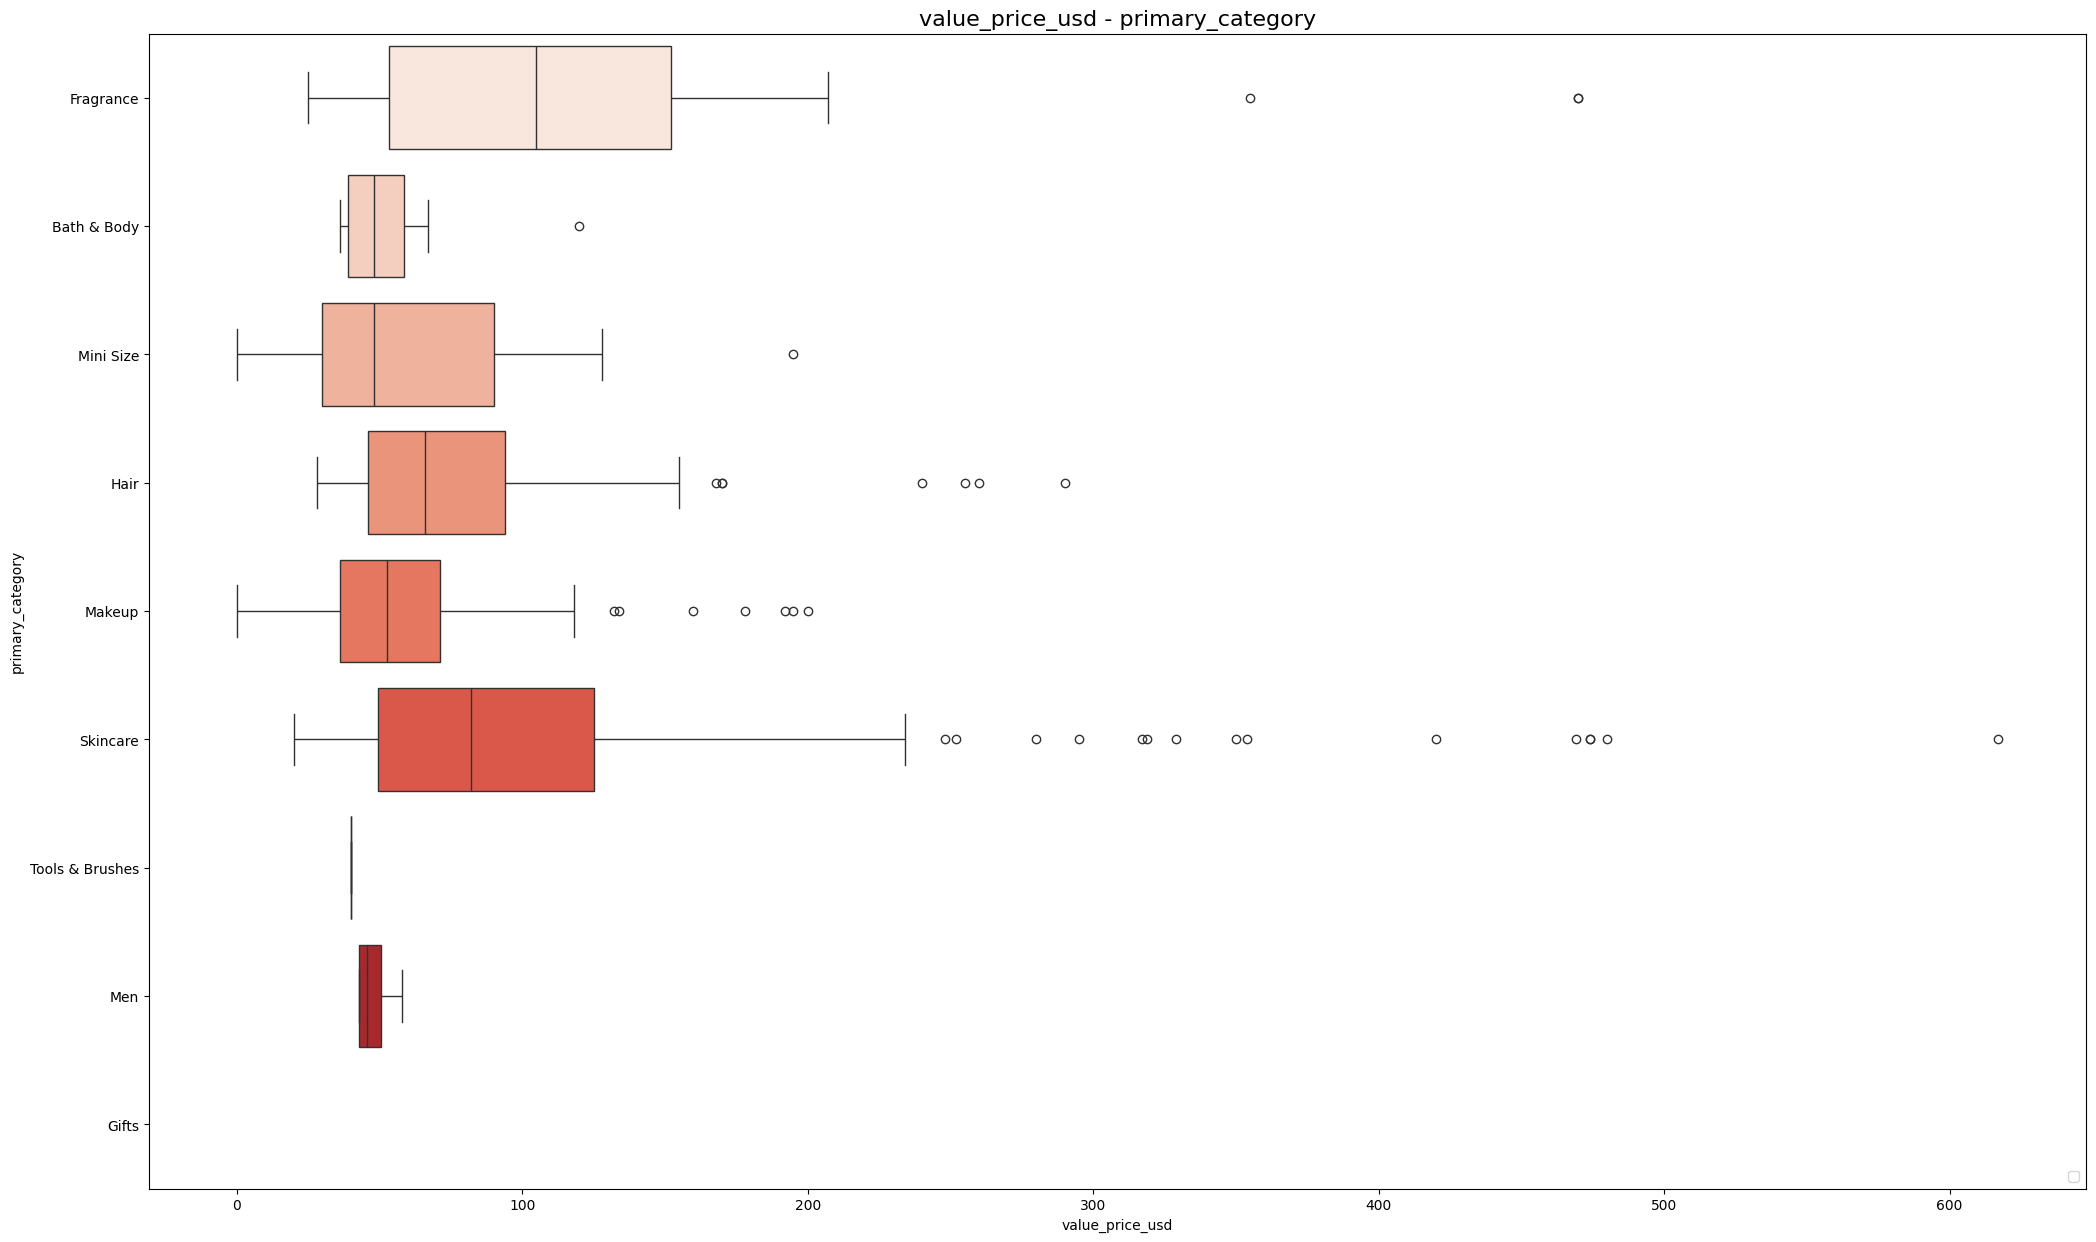

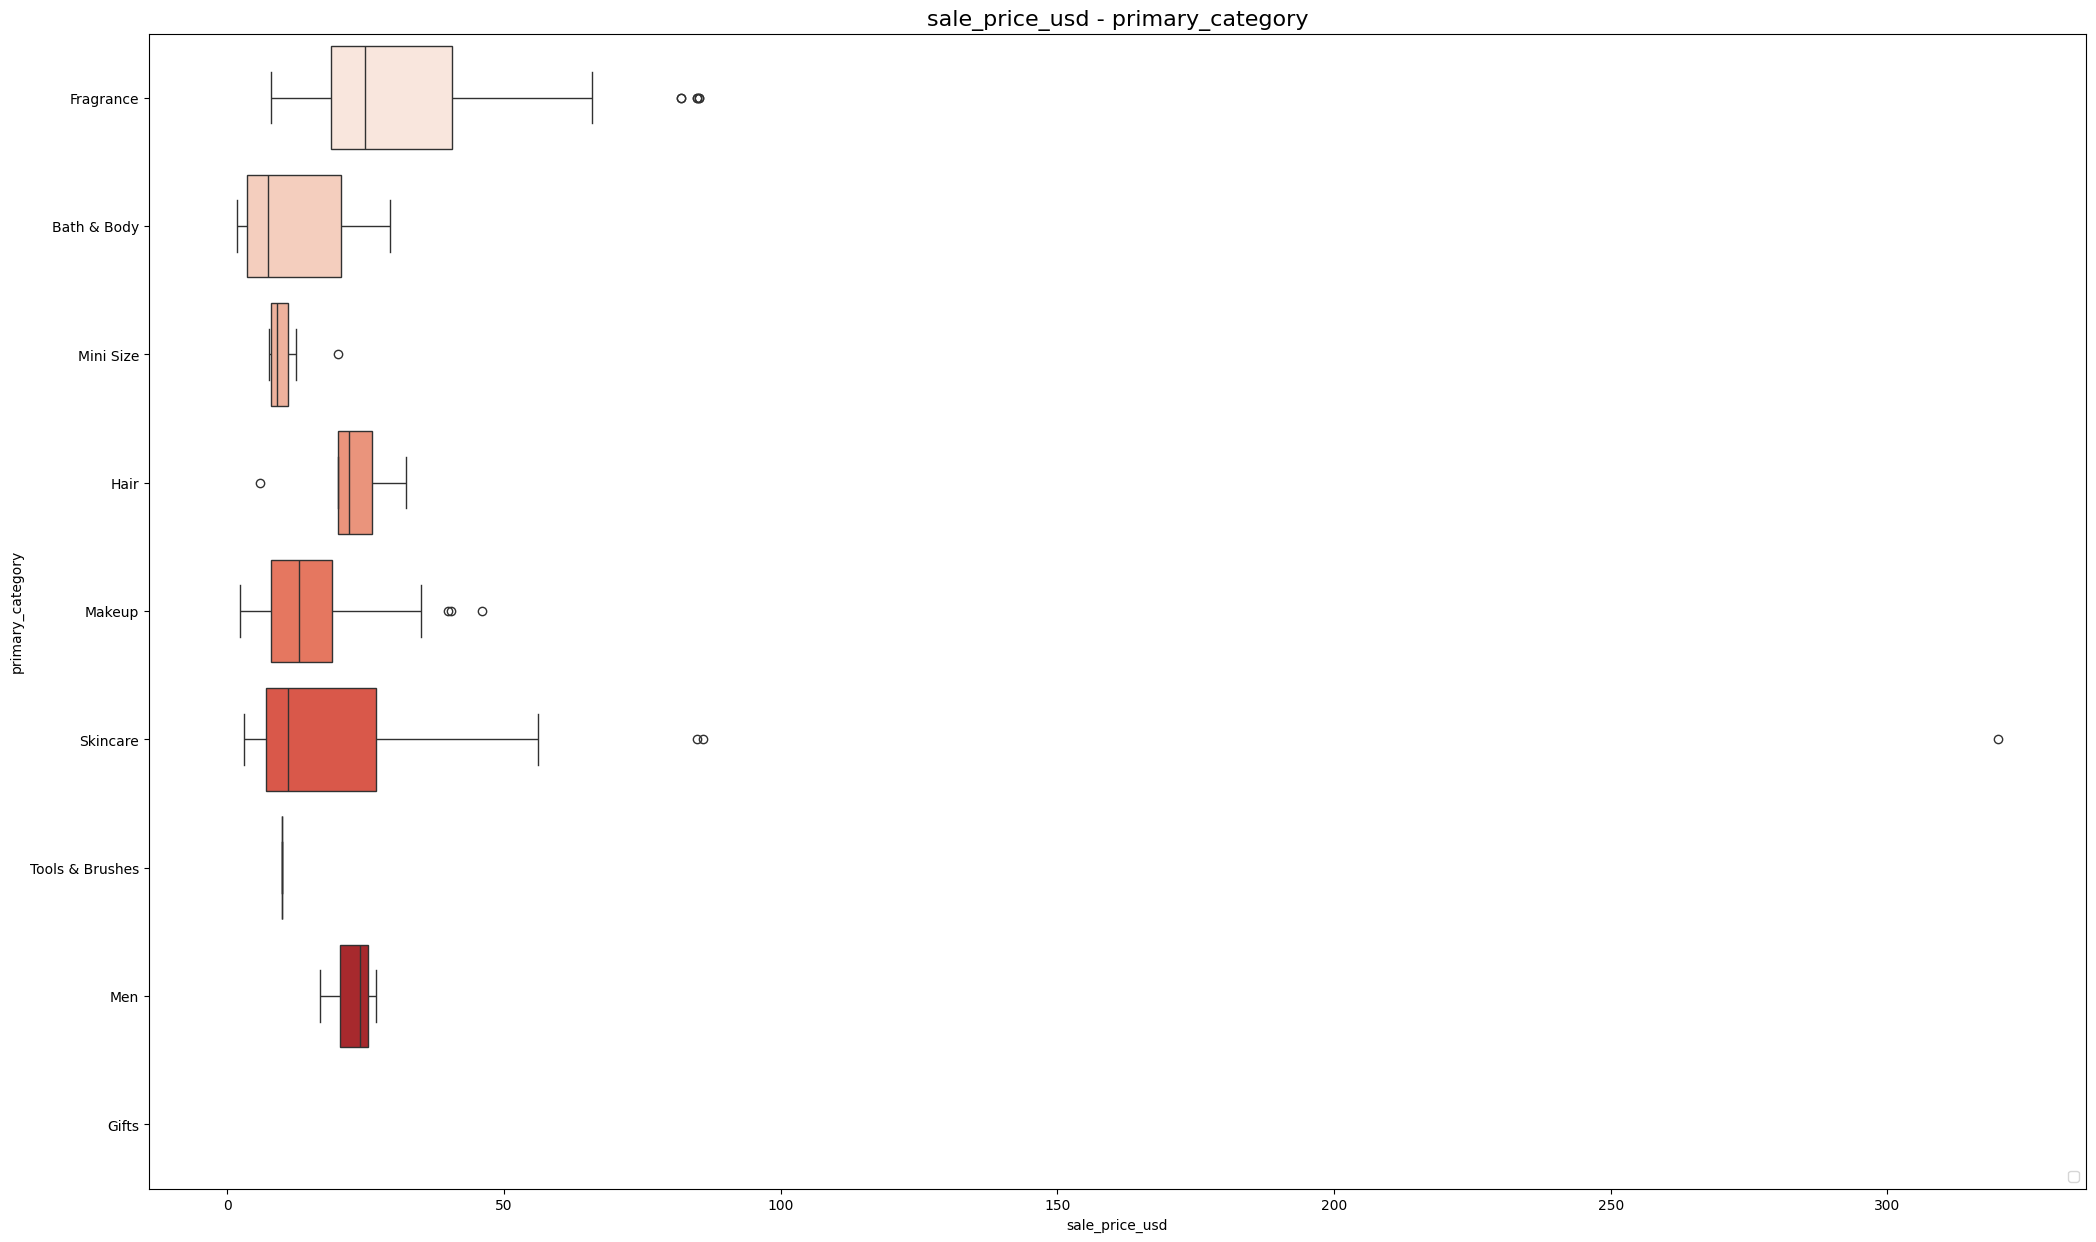

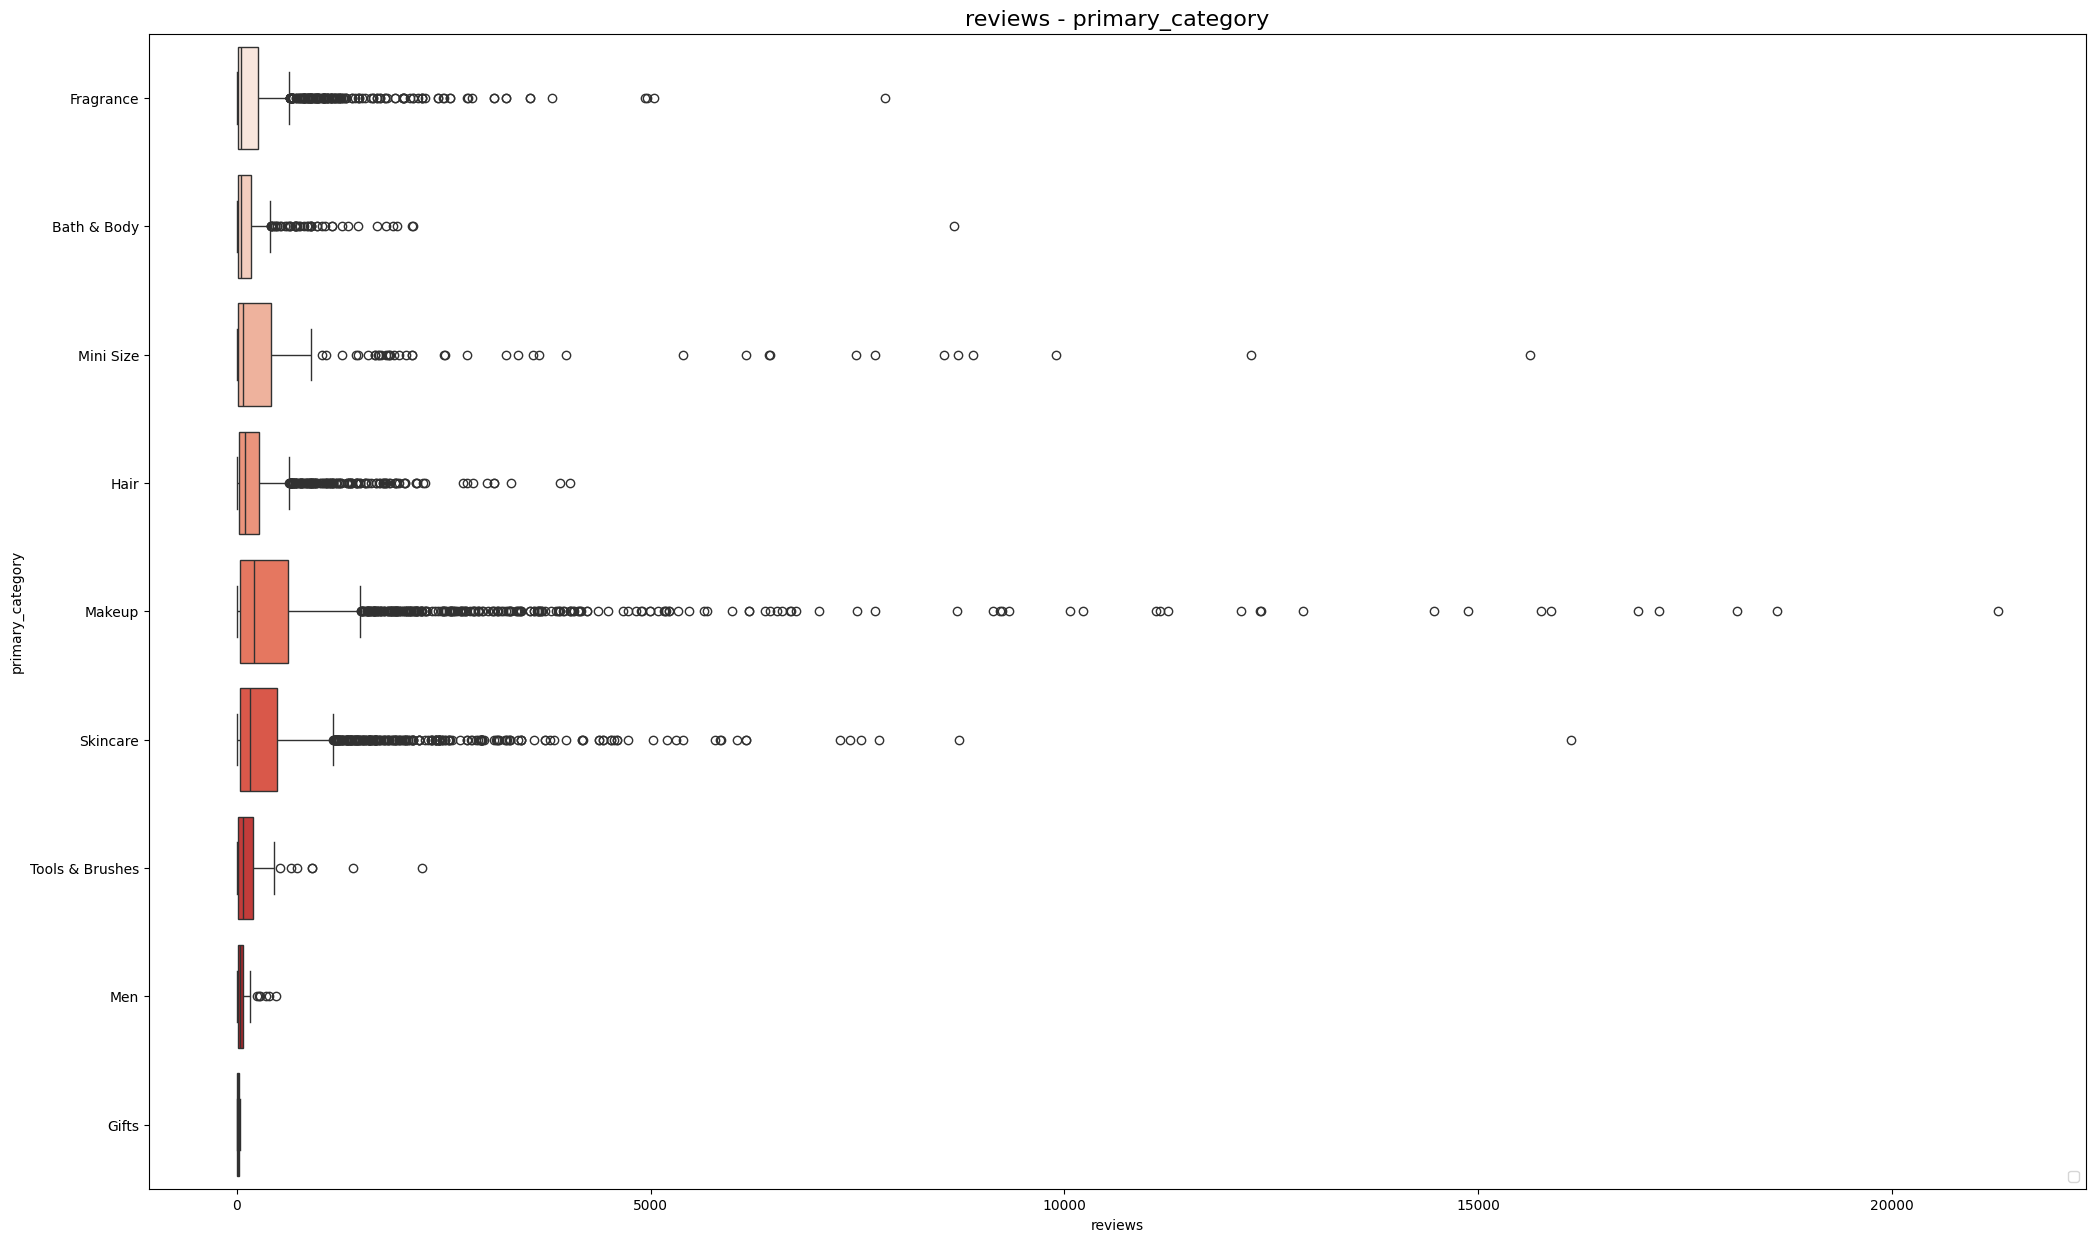

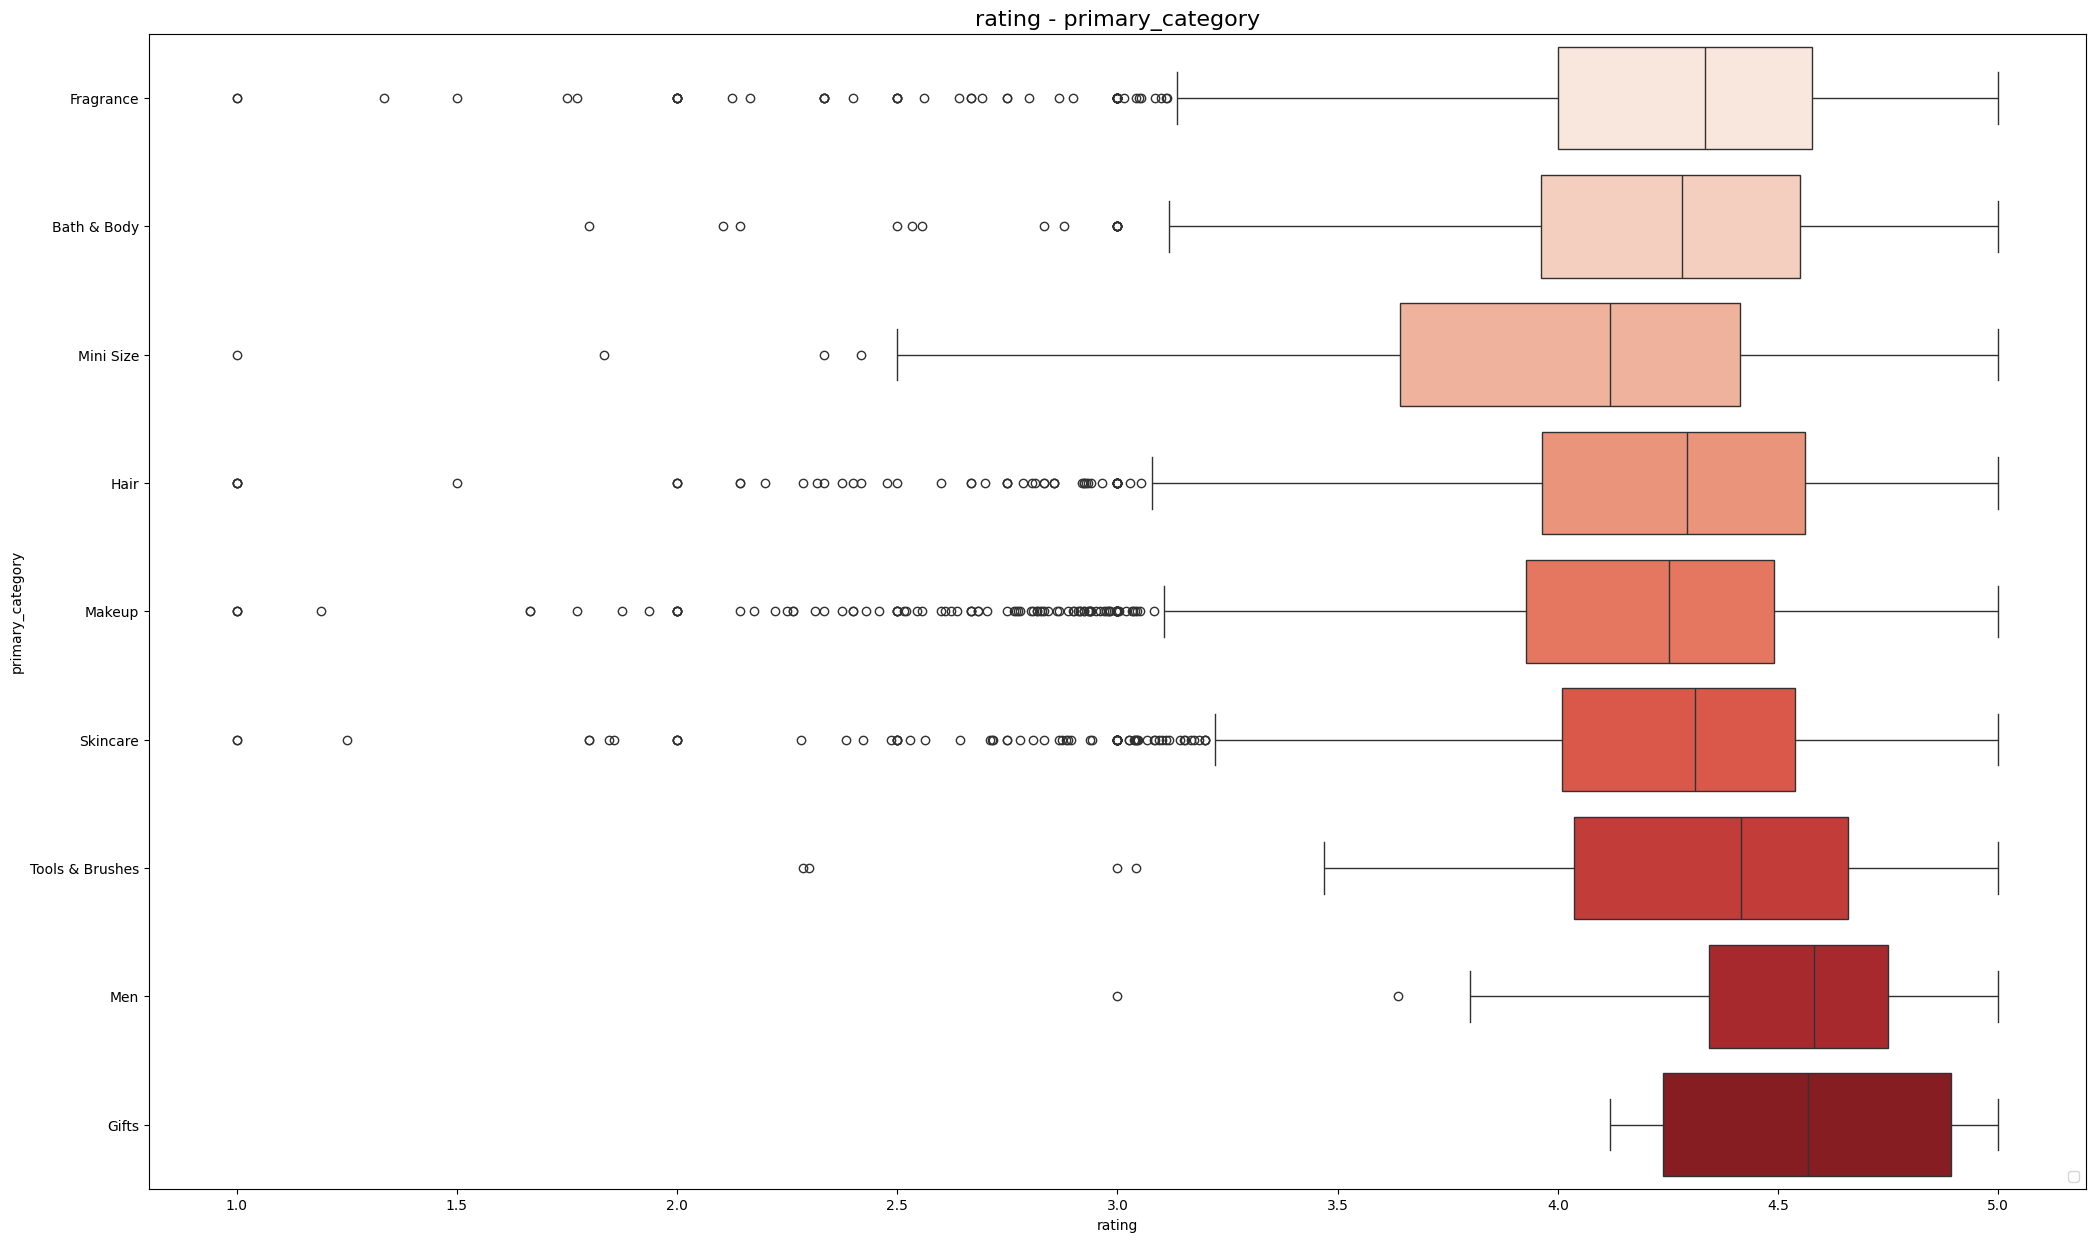

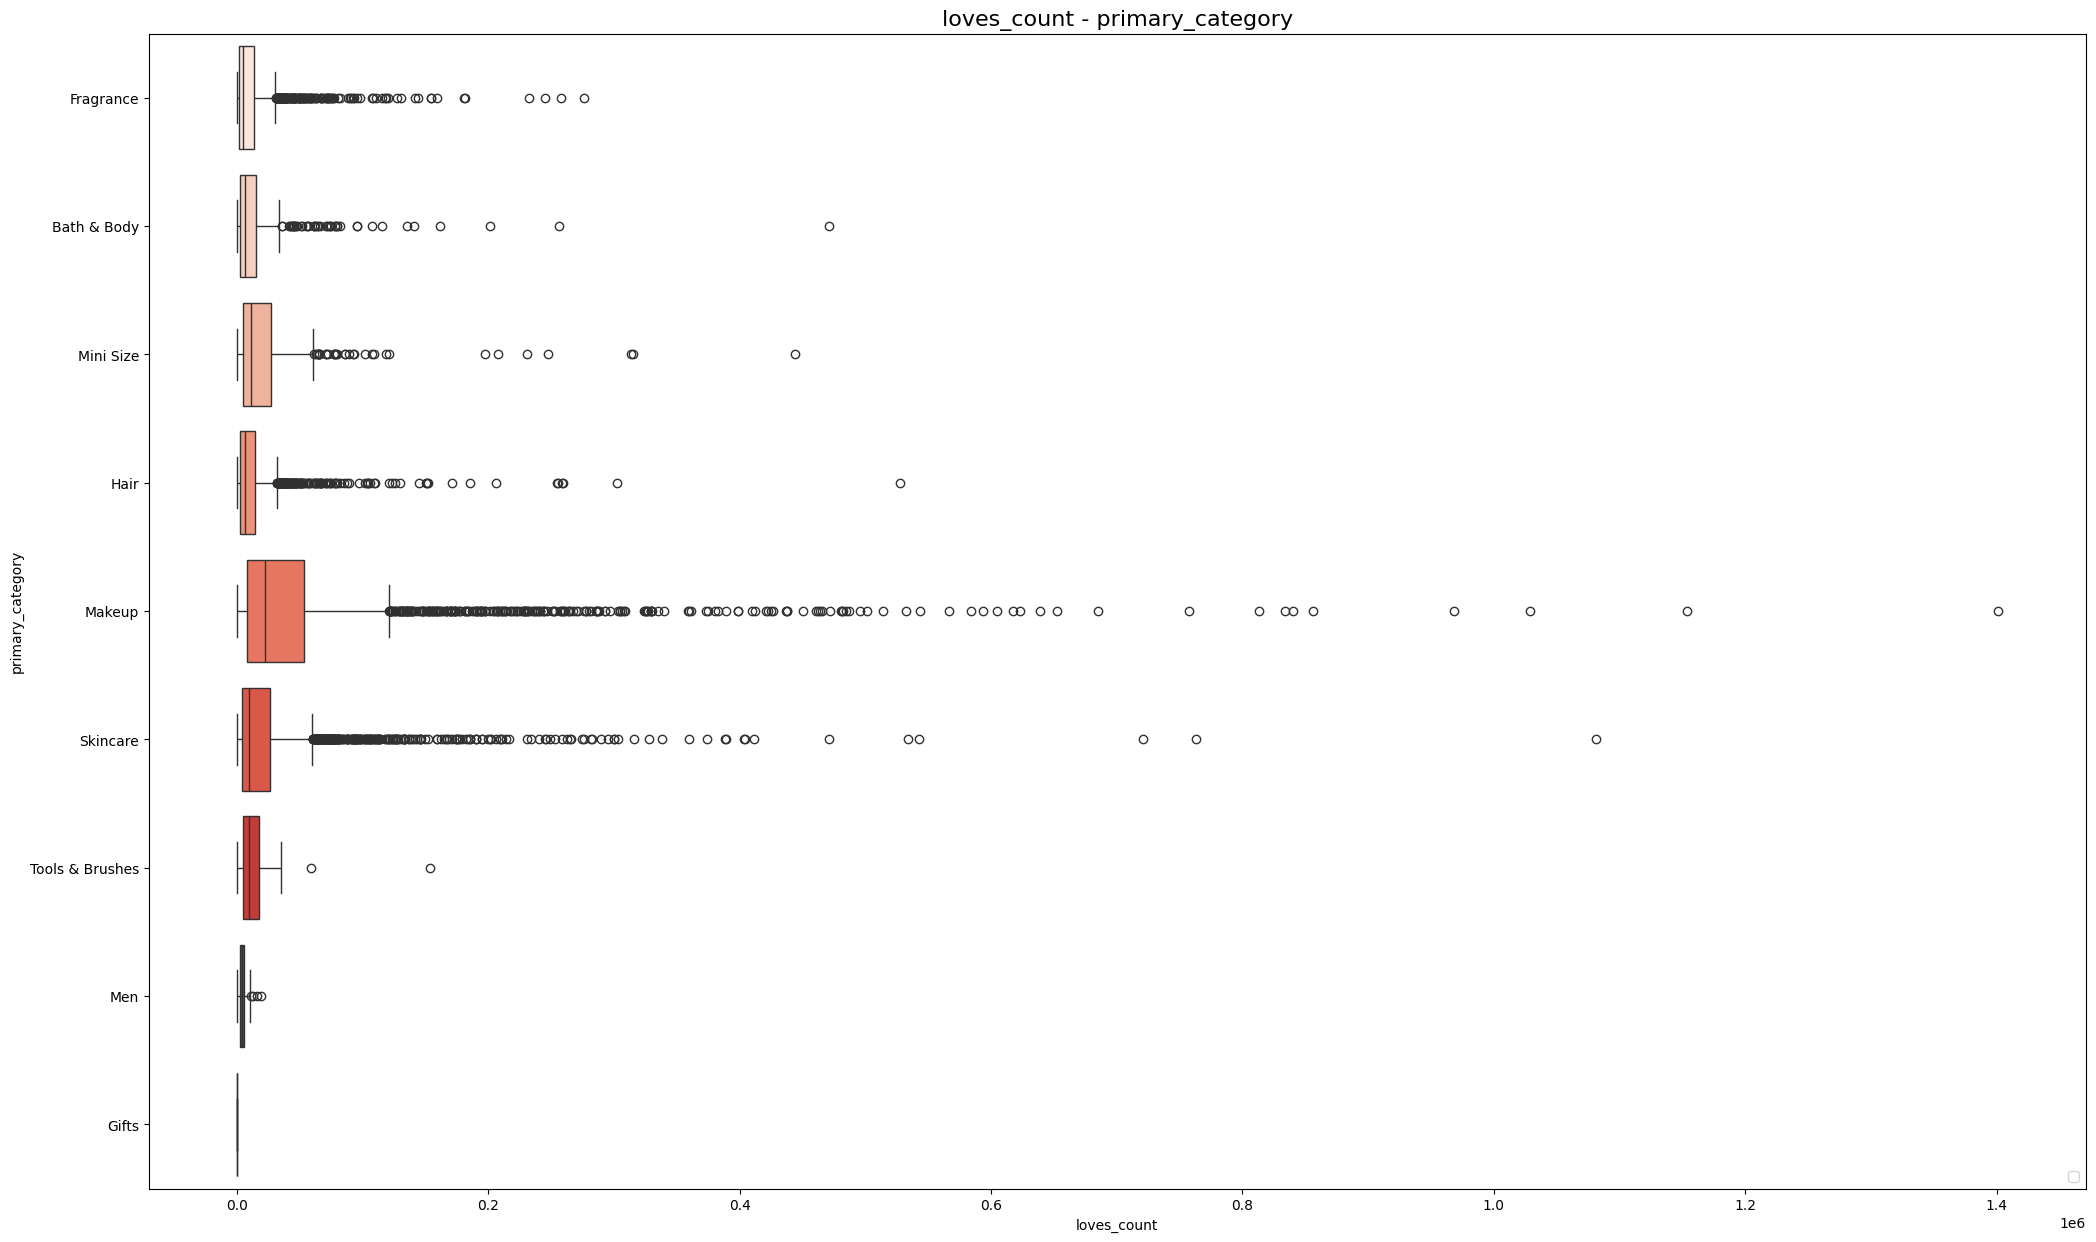

In [37]:
for column in ff:
    fig = plt.figure(figsize=(25,15))
    sns.boxplot(data=df_product, x=df_product[column], palette='Reds', y='primary_category', orient='h')
    plt.title(f'{column} - primary_category', fontsize='16')
    plt.legend(loc=4)
    plt.show()

:))))))))))) dm cai nay count thoi plot lam gi m 

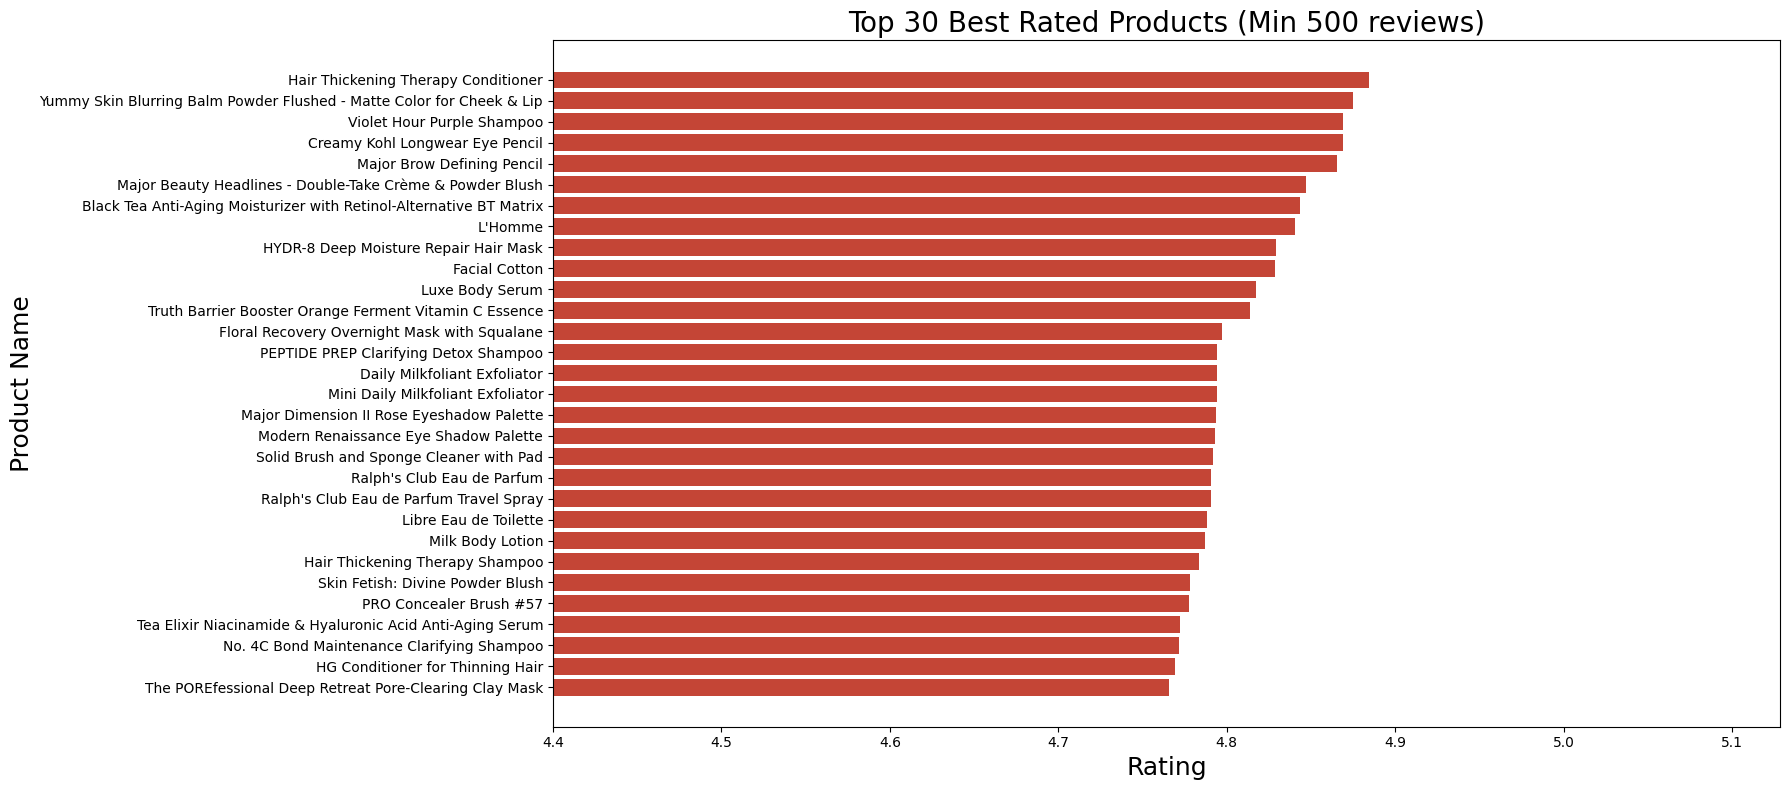

In [38]:
plt.figure(figsize=(18, 8), dpi=100)
brands = df_product[['product_name', 'brand_name', 'reviews', 'rating']].query('reviews > 500').sort_values('rating', ascending=False).head(30)
plt.barh(brands['product_name'], brands['rating'], color='#C44536')
plt.title('Top 30 Best Rated Products (Min 500 reviews)', fontsize=20)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Product Name', fontsize=18)
plt.gca().invert_yaxis()
plt.xlim(4.4)
plt.tight_layout()
plt.show()

Most loved products

Most expensive products

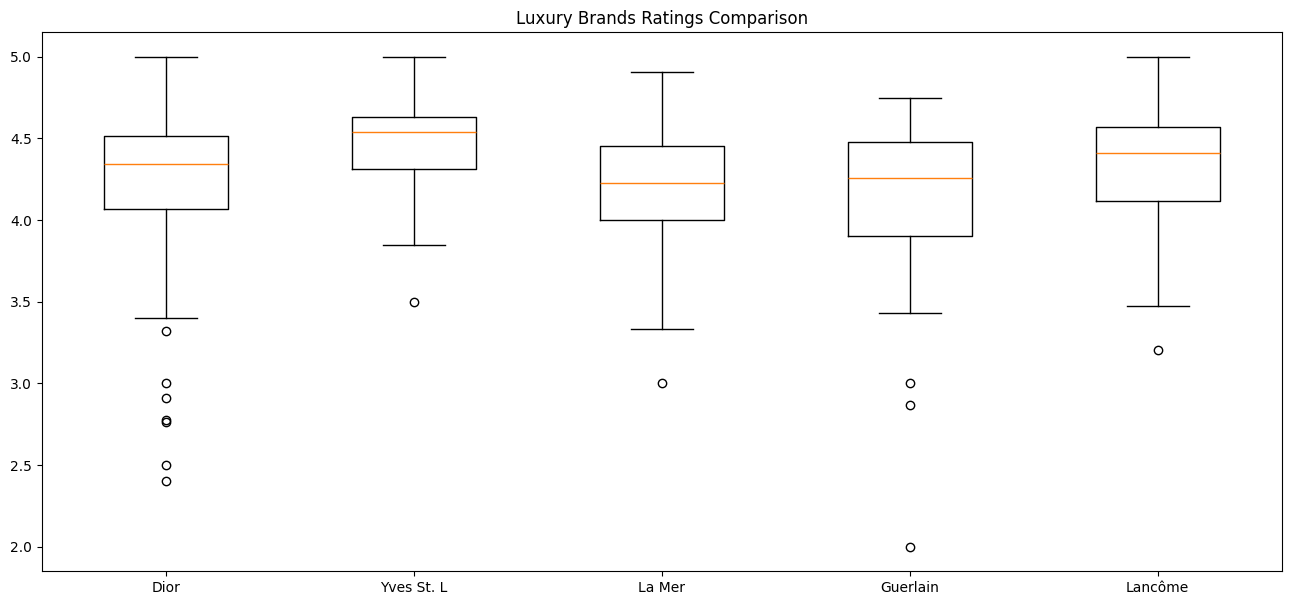

In [ ]:
#Cherry pick the, cư lam lenh top 5 theo price la dc rating / luot review  hay j do 
dr = df_product.query('brand_name == "Dior"')
ysl = df_product.query('brand_name == "Yves Saint Laurent"')
lm = df_product.query('brand_name == "La Mer"')
gr = df_product.query('brand_name == "GUERLAIN"')
lc = df_product.query('brand_name == "Lancôme"')
dior = dr['rating'].dropna()
ystl = ysl['rating'].dropna()
guerlain = gr['rating'].dropna()
lamer = lm['rating'].dropna()
lancome = lc['rating'].dropna()
labels = ['Dior', 'Yves St. L', 'La Mer', 'Guerlain', 'Lancôme']
plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Ratings Comparison')
plt.boxplot([dior, ystl, lamer, guerlain, lancome], labels=labels)
plt.show()

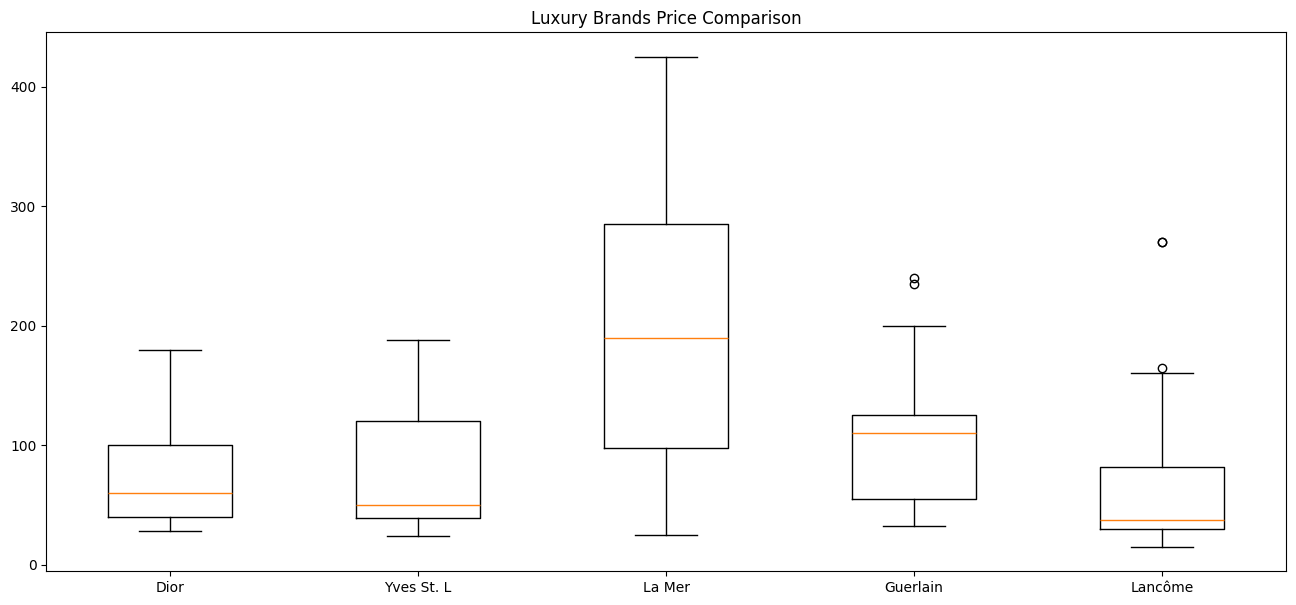

In [40]:
dior = dr['price_usd'].dropna()
ystl = ysl['price_usd'].dropna()
guerlain = gr['price_usd'].dropna()
lamer = lm['price_usd'].dropna()
lancome = lc['price_usd'].dropna()
labels = ['Dior', 'Yves St. L', 'La Mer', 'Guerlain', 'Lancôme']
plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Price Comparison')
plt.boxplot([dior, ystl, lamer, guerlain, lancome], labels=labels)
plt.show()

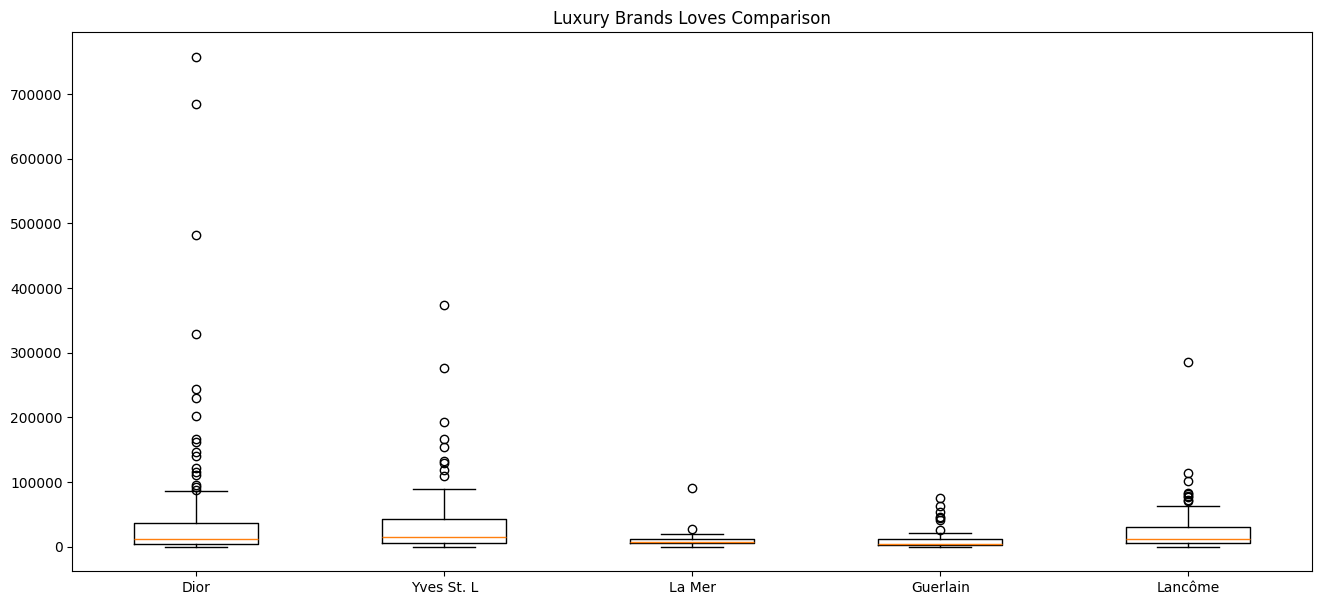

In [41]:
dior = dr['loves_count'].dropna()
ystl = ysl['loves_count'].dropna()
guerlain = gr['loves_count'].dropna()
lamer = lm['loves_count'].dropna()
lancome = lc['loves_count'].dropna()
labels = ['Dior', 'Yves St. L', 'La Mer', 'Guerlain', 'Lancôme']
plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Loves Comparison')
plt.boxplot([dior, ystl, lamer, guerlain, lancome], labels=labels)
plt.show()

# Review dataset

In [42]:
df1 = pd.read_csv('Data/reviews_0-250.csv')
df2 = pd.read_csv('Data/reviews_250-500.csv')
df3 = pd.read_csv('Data/reviews_500-750.csv')
df4 = pd.read_csv('Data/reviews_750-1250.csv')
df5 = pd.read_csv('Data/reviews_1250-end.csv')

df_review = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_review.head()

Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
0           0   1741593524       5             1.0          1.0   
1           1  31423088263       1             0.0          NaN   
2           2   5061282401       5             1.0          NaN   
3           3   6083038851       5             1.0          NaN   
4           4  47056667835       5             1.0          NaN   

   total_feedback_count  total_neg_feedback_count  total_pos_feedback_count  \
0                     2                         0                         2   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1      2023-03-21  I bought this lip mask after reading the revie...   
2      2023-03-21  My review title says it all! I get so excited ...   
3      2023-03-20  I’ve always loved this formula for a long time...   
4      2023-03-20  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!       NaN     brown          dry   
1                      Disappointed       NaN       NaN          NaN   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them       NaN     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                       product_name  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4        NaN    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name  price_usd  
0   NUDESTIX       19.0  
1    LANEIGE       24.0  
2    LANEIGE       24.0  
3    LANEIGE       24.0  
4    LANEIGE       24.0

In [43]:
df_review.shape

(1094411, 19)

In [44]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

In [45]:
df_review.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df_review.isnull().sum()

author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [46]:
df_review.duplicated().sum()

224

In [47]:
df_dup = df_review[df_review.duplicated()]
df_dup

author_id  rating  is_recommended  helpfulness  \
5339      1150759844       5             1.0          NaN   
5477      1604550515       5             1.0          NaN   
7242      2003943527       5             1.0          NaN   
7244      1557672780       5             1.0          NaN   
7911     12801717308       5             1.0          NaN   
...              ...     ...             ...          ...   
945008     909571449       5             1.0          1.0   
964820   11328153308       5             1.0          1.0   
999758    5447763758       5             1.0          NaN   
1008268  10379330825       5             1.0          NaN   
1020426   9113367813       5             1.0          NaN   

         total_feedback_count  total_neg_feedback_count  \
5339                        0                         0   
5477                        0                         0   
7242                        0                         0   
7244                        0                         0   
7911                        0                         0   
...                       ...                       ...   
945008                      1                         0   
964820                      2                         0   
999758                      0                         0   
1008268                     0                         0   
1020426                     0                         0   

         total_pos_feedback_count submission_time  \
5339                            0      2020-06-26   
5477                            0      2020-06-15   
7242                            0      2020-02-20   
7244                            0      2020-02-20   
7911                            0      2019-12-19   
...                           ...             ...   
945008                          1      2021-01-06   
964820                          2      2022-09-23   
999758                          0      2022-06-05   
1008268                         0      2021-04-06   
1020426                         0      2022-07-28   

                                               review_text  \
5339     I bought this after I tried a sample. It’s ver...   
5477     My lips are smooth & full! This feels wonderfu...   
7242     I love this lip mask! i use it twice a week an...   
7244     THE BEST!! Makes my lips so smooth and soft. I...   
7911     This lip mask is incredible! Especially in the...   
...                                                    ...   
945008   This moisturizer is hydrating and also gives m...   
964820   I received this toner as part of a free sample...   
999758   I really enjoy this product!  It has a thinner...   
1008268  I appreciate that this toner is unscented beca...   
1020426  I’ve been using this product on my eyes for fe...   

                      review_title  skin_tone eye_color    skin_type  \
5339                           NaN       deep     brown  combination   
5477                Full Baby Lips  mediumTan     brown  combination   
7242            The Softest lips!!      olive     brown         oily   
7244     More than a sleeping mask  mediumTan     brown  combination   
7911             Beauty Must Have!      light      blue  combination   
...                            ...        ...       ...          ...   
945008   Hydrating and brightening      light      blue          dry   
964820                    Love it!  fairLight     hazel          dry   
999758                         NaN        tan     brown  combination   
1008268                        NaN       fair     brown  combination   
1020426                        NaN      light     hazel  combination   

        hair_color product_id  \
5339           red    P420652   
5477         black    P420652   
7242      brunette    P420652   
7244        auburn    P420652   
7911        blonde    P420652   
...            ...        ...   
945008       brown    P467750   
964820       brown    P500894   
999758       brown    P50

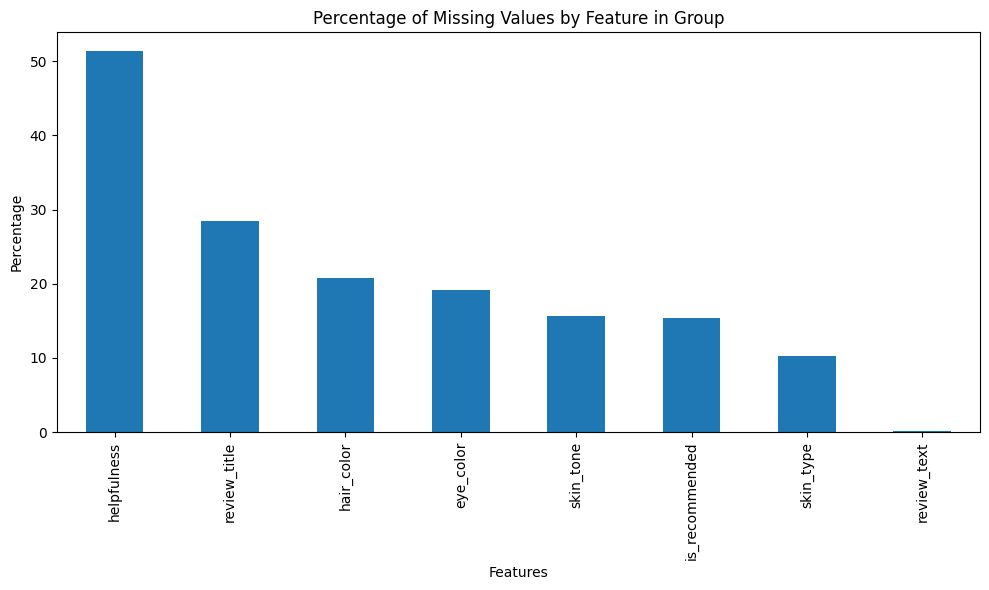

Feature  Missing Count  \
helpfulness                            helpfulness         561592   
review_title                          review_title         310654   
hair_color                              hair_color         226768   
eye_color                                eye_color         209628   
skin_tone                                skin_tone         170539   
is_recommended                      is_recommended         167988   
skin_type                                skin_type         111557   
review_text                            review_text           1444   
brand_name                              brand_name              0   
product_name                          product_name              0   
product_id                              product_id              0   
author_id                                author_id              0   
rating                                      rating              0   
submission_time                    submission_time              0   
total_pos_feedback_count  total_pos_feedback_count              0   
total_neg_feedback_count  total_neg_feedback_count              0   
total_feedback_count          total_feedback_count              0   
price_usd                                price_usd              0   

                          Missing Percentage  
helpfulness                        51.314543  
review_title                       28.385497  
hair_color                         20.720552  
eye_color                          19.154413  
skin_tone                          15.582720  
is_recommended                     15.349626  
skin_type                          10.193337  
review_text                         0.131943  
brand_name                          0.000000  
product_name                        0.000000  
product_id                          0.000000  
author_id                           0.000000  
rating                              0.000000  
submission_time                     0.000000  
total_pos_feedback_count            0.000000  
total_neg_feedback_count            0.000000  
total_feedback_count                0.000000  
price_usd                           0.000000

In [49]:
quantify_missing_data_by_group(df_review, df_review.columns.tolist())

There are 44 duplicated rows (reviews column are not duplicated) in the dataset and we can see plenty of NAN datas.

10 columns are of type Object, 3 columns are of type float64, and the rest are of type int64.

## Numerical columns

In [50]:
numeric_cols = df_review.select_dtypes(include = ['number']).columns
print(numeric_cols)

Index(['rating', 'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd'],
      dtype='object')


In [51]:
df_review['is_recommended'].value_counts()

is_recommended
1.0    778160
0.0    148263
Name: count, dtype: int64

In [52]:
df_review['rating'].value_counts()

rating
5    698951
4    199389
3     81816
1     61223
2     53032
Name: count, dtype: int64

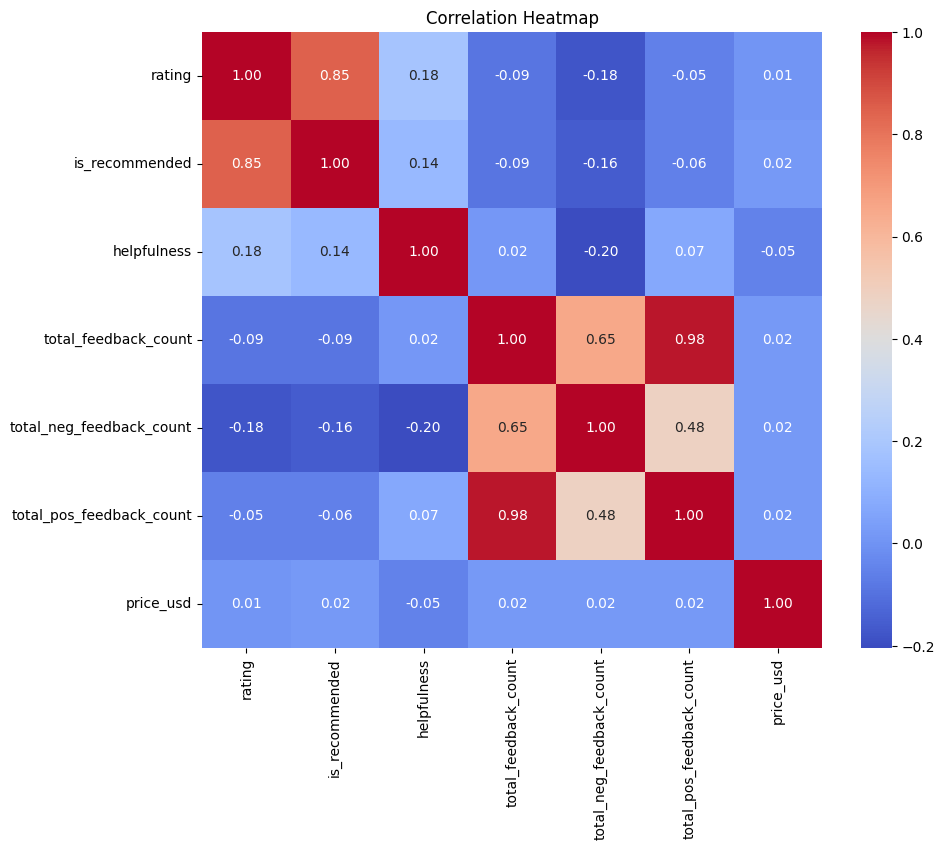

In [53]:
numeric_df = df_review.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()


rating and is_recommended: Correlation coefficient: 0.85

total_feedback_count and total_pos_feedback_count: Correlation coefficient: 0.98


rating Statistics:
count: 1094411.00, mean: 4.30, std: 1.15, min: 1.00, 25%: 4.00, 50%: 5.00, 75%: 5.00, max: 5.00


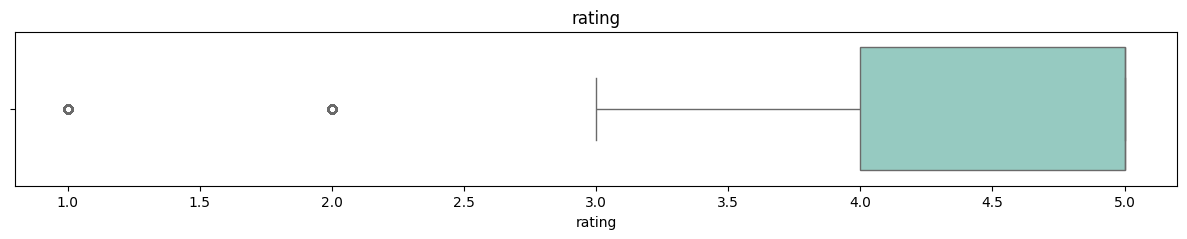


is_recommended Statistics:
count: 926423.00, mean: 0.84, std: 0.37, min: 0.00, 25%: 1.00, 50%: 1.00, 75%: 1.00, max: 1.00


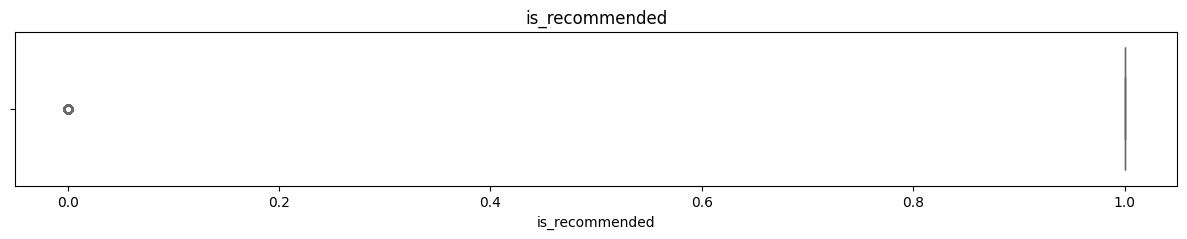


total_feedback_count Statistics:
count: 1094411.00, mean: 4.18, std: 22.72, min: 0.00, 25%: 0.00, 50%: 0.00, 75%: 3.00, max: 5464.00


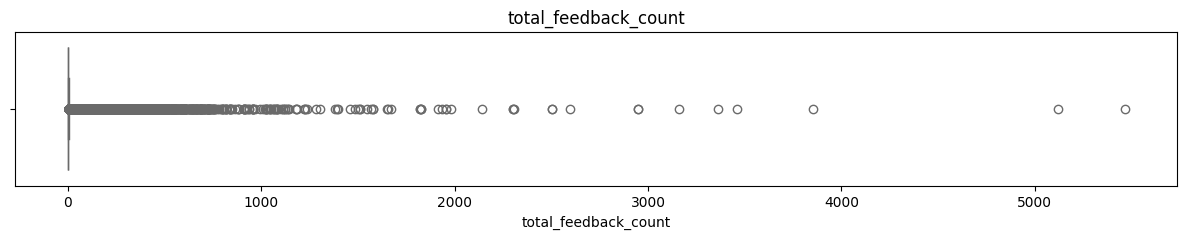


total_neg_feedback_count Statistics:
count: 1094411.00, mean: 0.89, std: 5.29, min: 0.00, 25%: 0.00, 50%: 0.00, 75%: 1.00, max: 1159.00


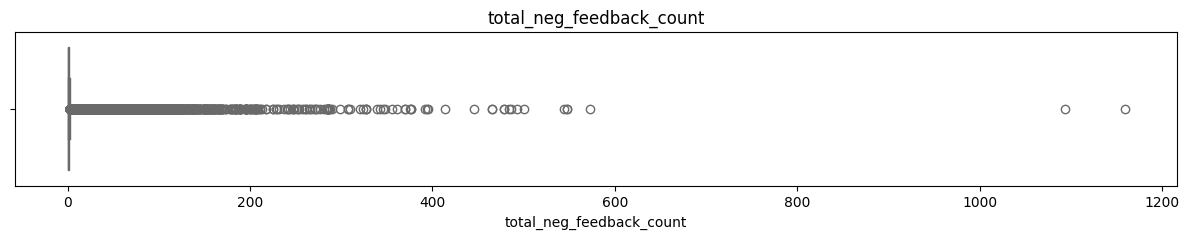


total_pos_feedback_count Statistics:
count: 1094411.00, mean: 3.28, std: 19.67, min: 0.00, 25%: 0.00, 50%: 0.00, 75%: 3.00, max: 5050.00


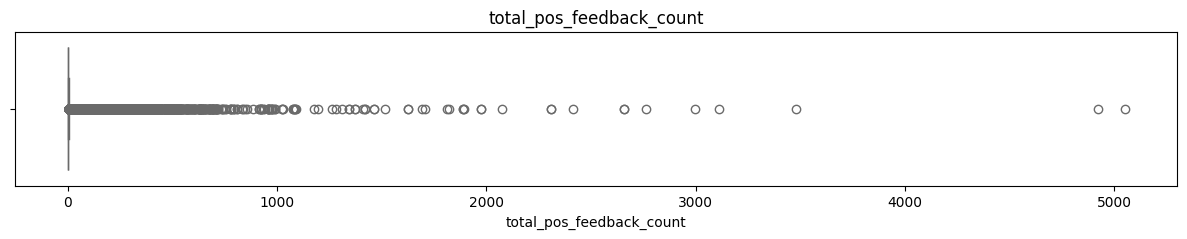


price_usd Statistics:
count: 1094411.00, mean: 49.01, std: 40.04, min: 3.00, 25%: 25.00, 50%: 39.00, 75%: 62.00, max: 1900.00


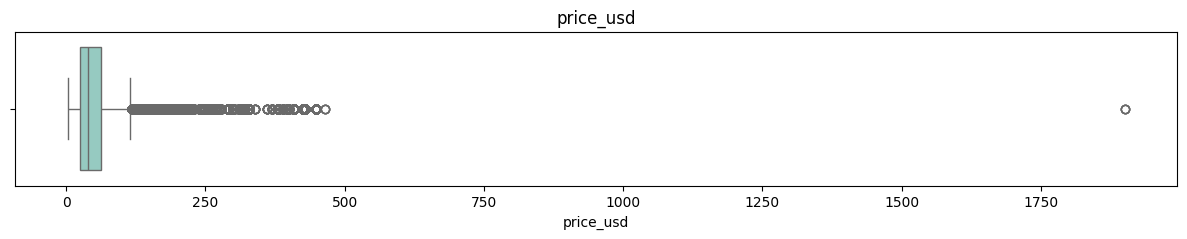

In [54]:
ff = ['rating', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
for column in ff:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df_review[column], palette="Set3")
    plt.title(column)
    stats = df_review[column].describe()
    stats_text = ", ".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}")
    plt.show()

#### Outlier

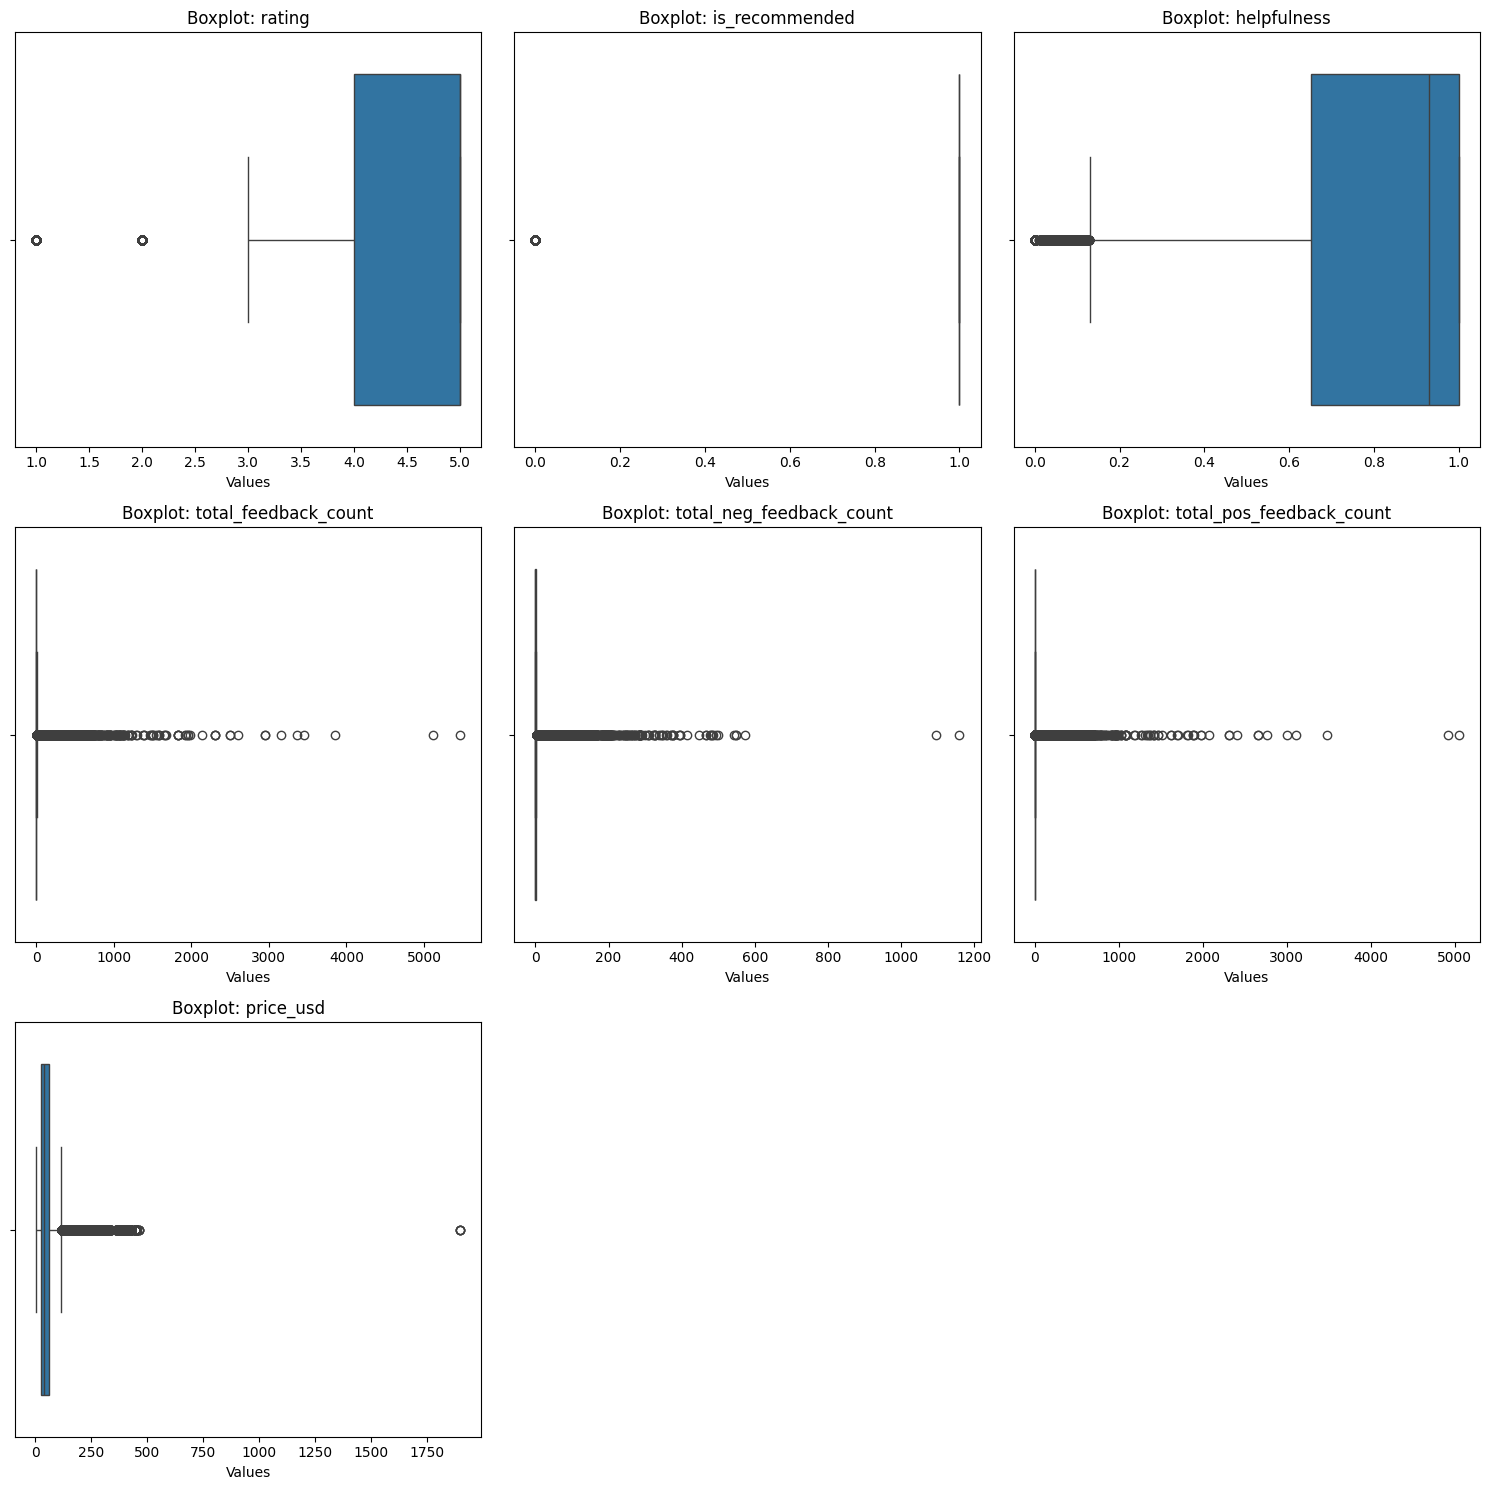

In [56]:
visualize_outlier_columns(df_review, method='iqr')

Outlier check tay hay k nha nhin cai nao kinh di qua chekc taytay

## Categorical columns

In [57]:
non_numeric_cols = df_review.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name'],
      dtype='object')


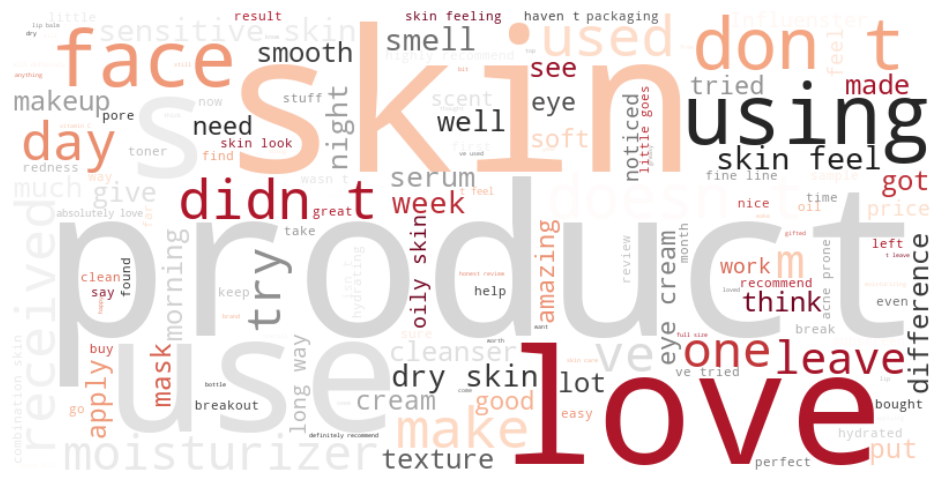

In [58]:
from wordcloud import WordCloud, STOPWORDS
# Extract the "review_text" column from the data frame
review_text = df_review['review_text'].astype(str)

# Define stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "don t", "didn t", "don't", "doesn't", "didn't" ]) 

# Create a word cloud
word_cloud = WordCloud(stopwords=stopwords,
                       max_words=150,
                       background_color='white',
                       colormap='RdGy',  # Change the color scheme
                       width=800,
                       height=400).generate(' '.join(review_text))

# Display the generated word cloud
plt.figure(figsize=(12, 6))  # Modify the figure size
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

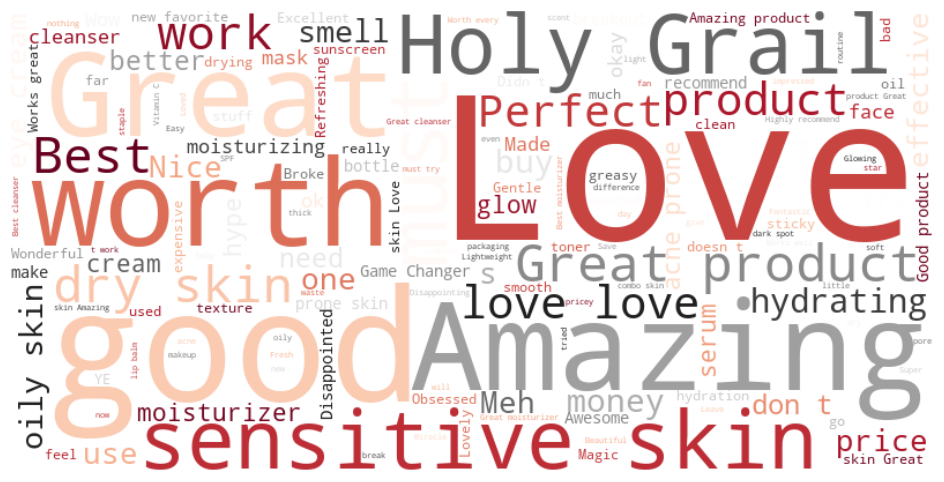

In [59]:
df_re = df_review.dropna()
review_text = df_re['review_title'].astype(str)

# Define stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "don t", "didn t", "don't", "doesn't", "didn't" ]) 

# Create a word cloud
word_cloud = WordCloud(stopwords=stopwords,
                       max_words=150,
                       background_color='white',
                       colormap='RdGy',  # Change the color scheme
                       width=800,
                       height=400).generate(' '.join(review_text))

# Display the generated word cloud
plt.figure(figsize=(12, 6))  # Modify the figure size
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Merge data

#T nghi ko nen merge data y. Minh xu li aggragate cai review da r moi nen merge 

In [60]:
cols_to_use = df_product.columns.difference(df_review.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')
print(cols_to_use)

['brand_id', 'child_count', 'child_max_price', 'child_min_price', 'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd', 'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category', 'value_price_usd', 'variation_desc', 'variation_type', 'variation_value', 'product_id']


In [61]:
df = pd.merge(df_review, df_product[cols_to_use], how='outer', on=['product_id', 'product_id'])
df.shape

(1100554, 40)

In [63]:
df['is_recommended'].value_counts()

is_recommended
1.0    778160
0.0    148263
Name: count, dtype: int64

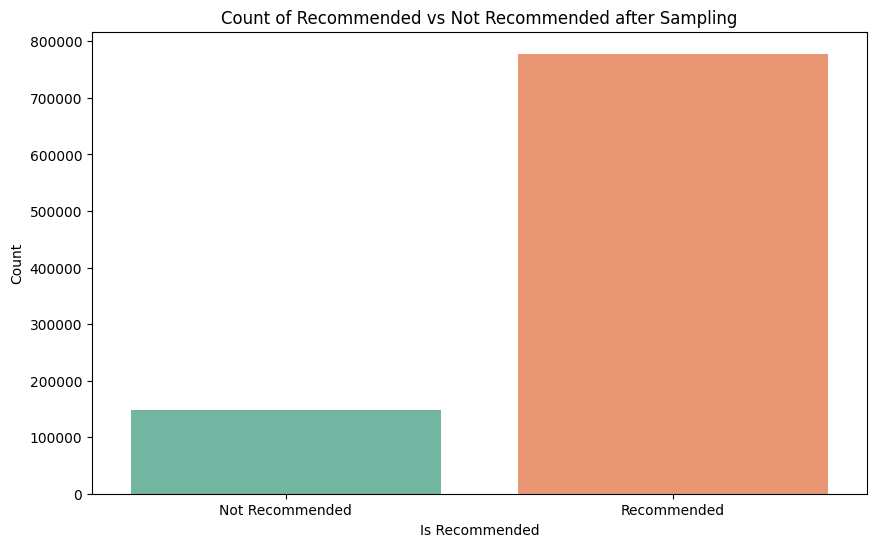

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_recommended', palette='Set2')
plt.title('Count of Recommended vs Not Recommended after Sampling')
plt.xlabel('Is Recommended')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()

<Axes: xlabel='is_recommended', ylabel='helpfulness'>

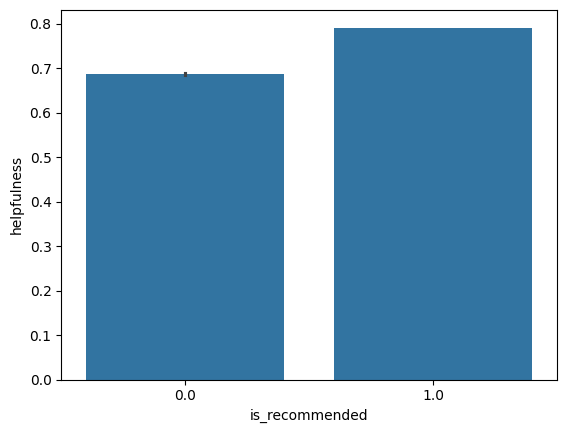

In [65]:
sns.barplot(df,y = df['helpfulness'],x=df['is_recommended'])

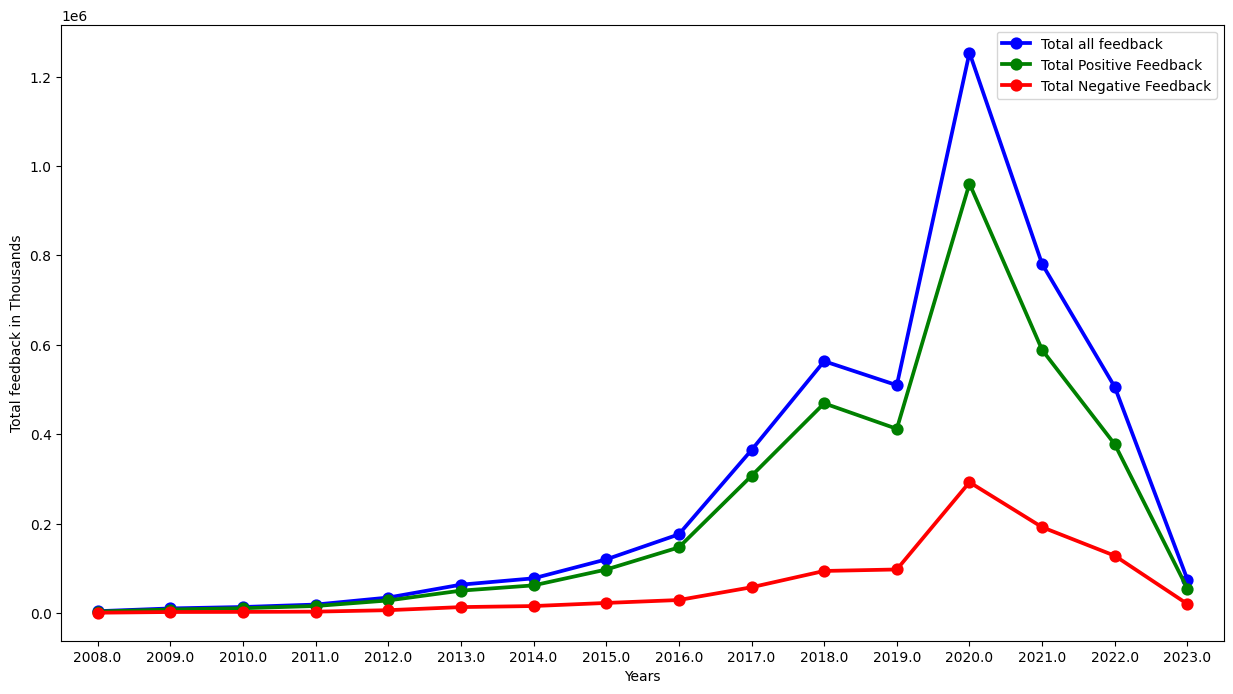

In [66]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize= (15,8))
total_feedback = df.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()

sns.pointplot(total_feedback,x='year',y='total_feedback_count', color="blue", label="Total all feedback",ax=ax1)

total_pos_feedback = df.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
sns.pointplot(total_pos_feedback,x='year',y='total_pos_feedback_count', color="green", label="Total Positive Feedback",ax=ax1)

total_neg_feedback = df.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()
sns.pointplot(total_neg_feedback,x='year',y='total_neg_feedback_count', color="red", label="Total Negative Feedback",ax=ax1)

ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

Text(0.5, 0.98, 'Top 10 Product based on price')

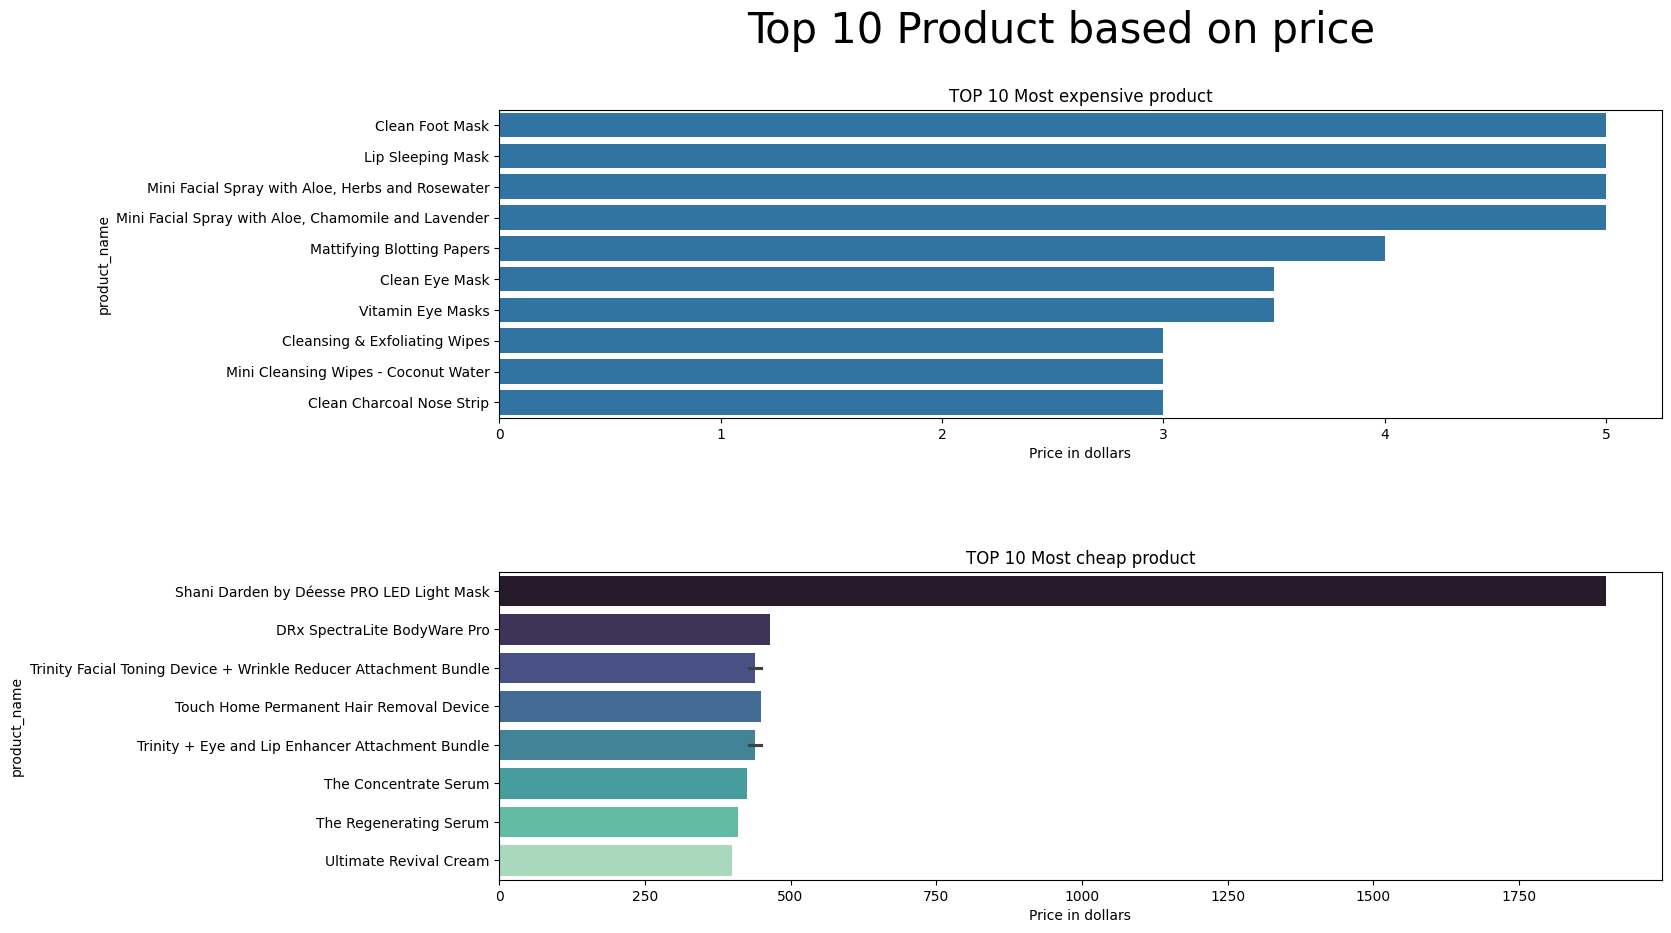

In [67]:
# Top 10 most expensive and cheap product

#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_expensive = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=True).head(10).sort_values('price_usd',ascending=False)
most_expensive
sns.barplot(most_expensive,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most expensive product")
ax1.set_xlabel("Price in dollars")

cheapest = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=False).head(10)
sns.barplot(cheapest,x='price_usd',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most cheap product")
ax2.set_xlabel("Price in dollars")

plt.suptitle("Top 10 Product based on price",fontsize=30)

Cai nay nen theo brand nhe =)))) hnhu do brand ms dat, vs ca cai nay lam o tren product la dc xuong review cx ko can 

Text(0.5, 0.98, 'Top 10 Product')

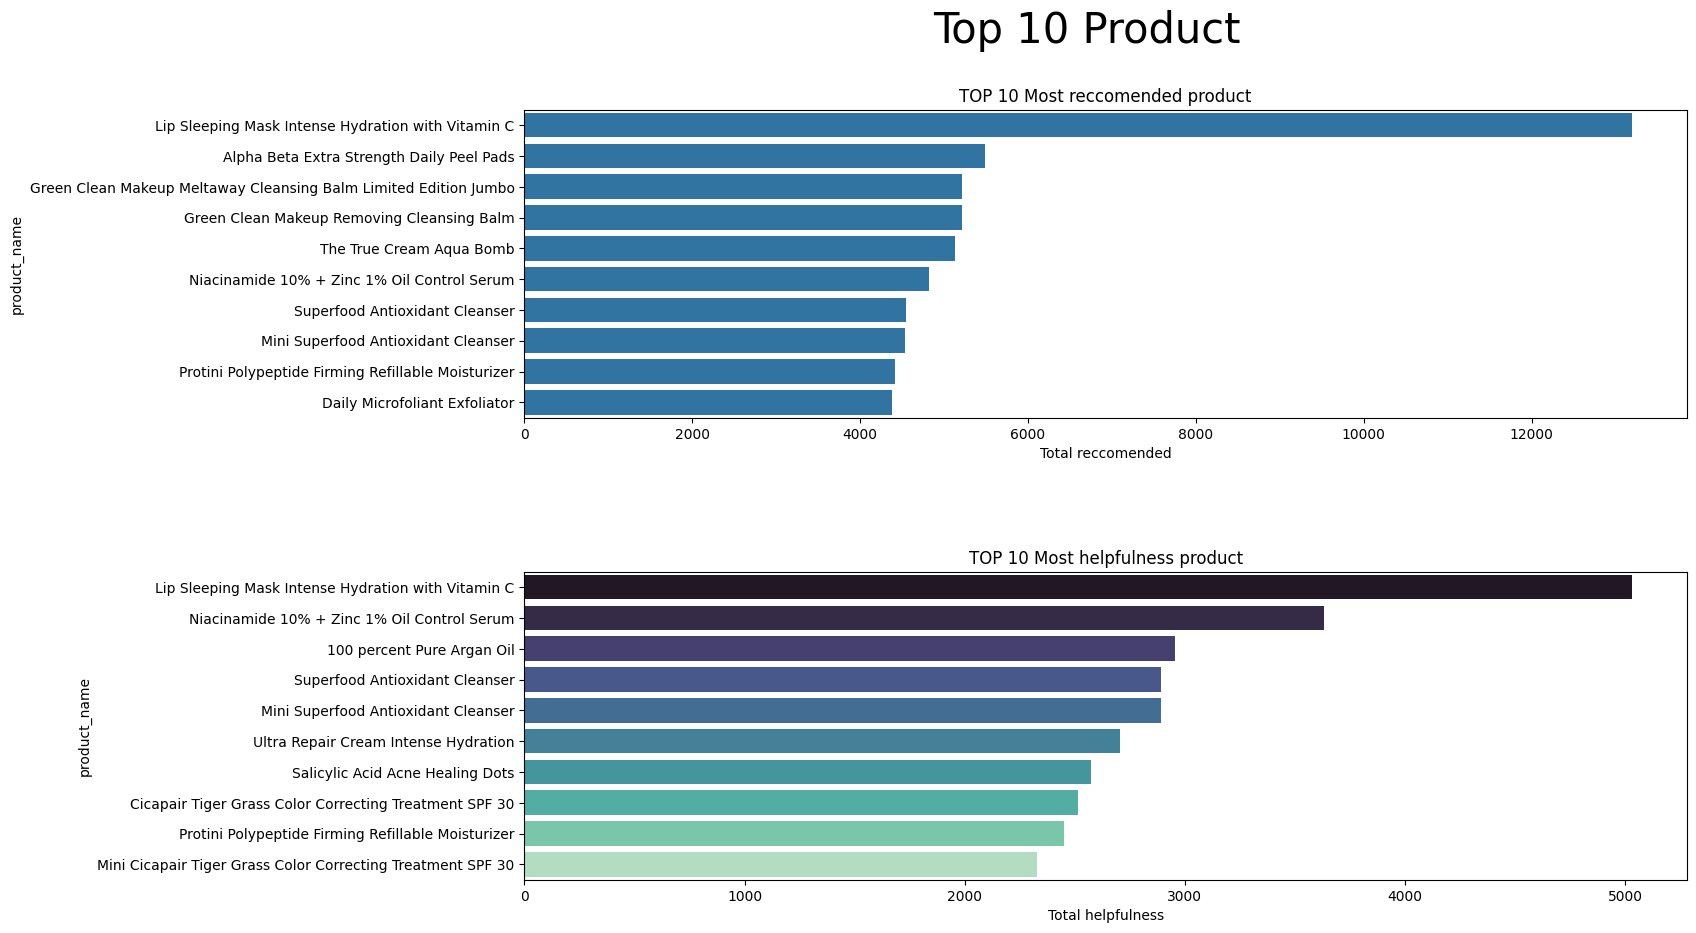

In [68]:
#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_reccomended = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['is_recommended'].reset_index()\
.sort_values('is_recommended',ascending=False).head(10)
sns.barplot(most_reccomended,x='is_recommended',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most reccomended product")
ax1.set_xlabel("Total reccomended")

most_helpfulness = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['helpfulness'].reset_index()\
.sort_values('helpfulness',ascending=False).head(10)
sns.barplot(most_helpfulness,x='helpfulness',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most helpfulness product")
ax2.set_xlabel("Total helpfulness")

plt.suptitle("Top 10 Product",fontsize=30)